<a href="https://colab.research.google.com/github/descartesmbogning/Deciphering_Bacteriophage_Revolution/blob/main/1_scholar_analysis_trend2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [4]:
# function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

## import data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
# Filter based on 'Publication Year' column
#data = data[data['Publication Year'] >= 2003]
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
#data#.head()

In [7]:
# Check the number of papers
num_papers = data.shape[0]
print(f"Number of Papers: {num_papers}")


Number of Papers: 36202


# Publications trends

In [118]:
data_trend = data['Publication Year'].value_counts().reset_index().sort_values('index')
# Rename columns
data_trend.columns = ['Year', 'Publication Count']
data_trend

Year  Publication Count
16  2003               1451
17  2004               1438
19  2005               1343
18  2006               1431
13  2007               1491
15  2008               1480
14  2009               1483
12  2010               1573
11  2011               1682
8   2012               1728
10  2013               1715
7   2014               1769
9   2015               1717
6   2016               1860
5   2017               1871
4   2018               1928
3   2019               1975
2   2020               2022
1   2021               2219
0   2022               2786
20  2023               1240

In [102]:
#data_trend['Publication Count'].to_list()[:-1]

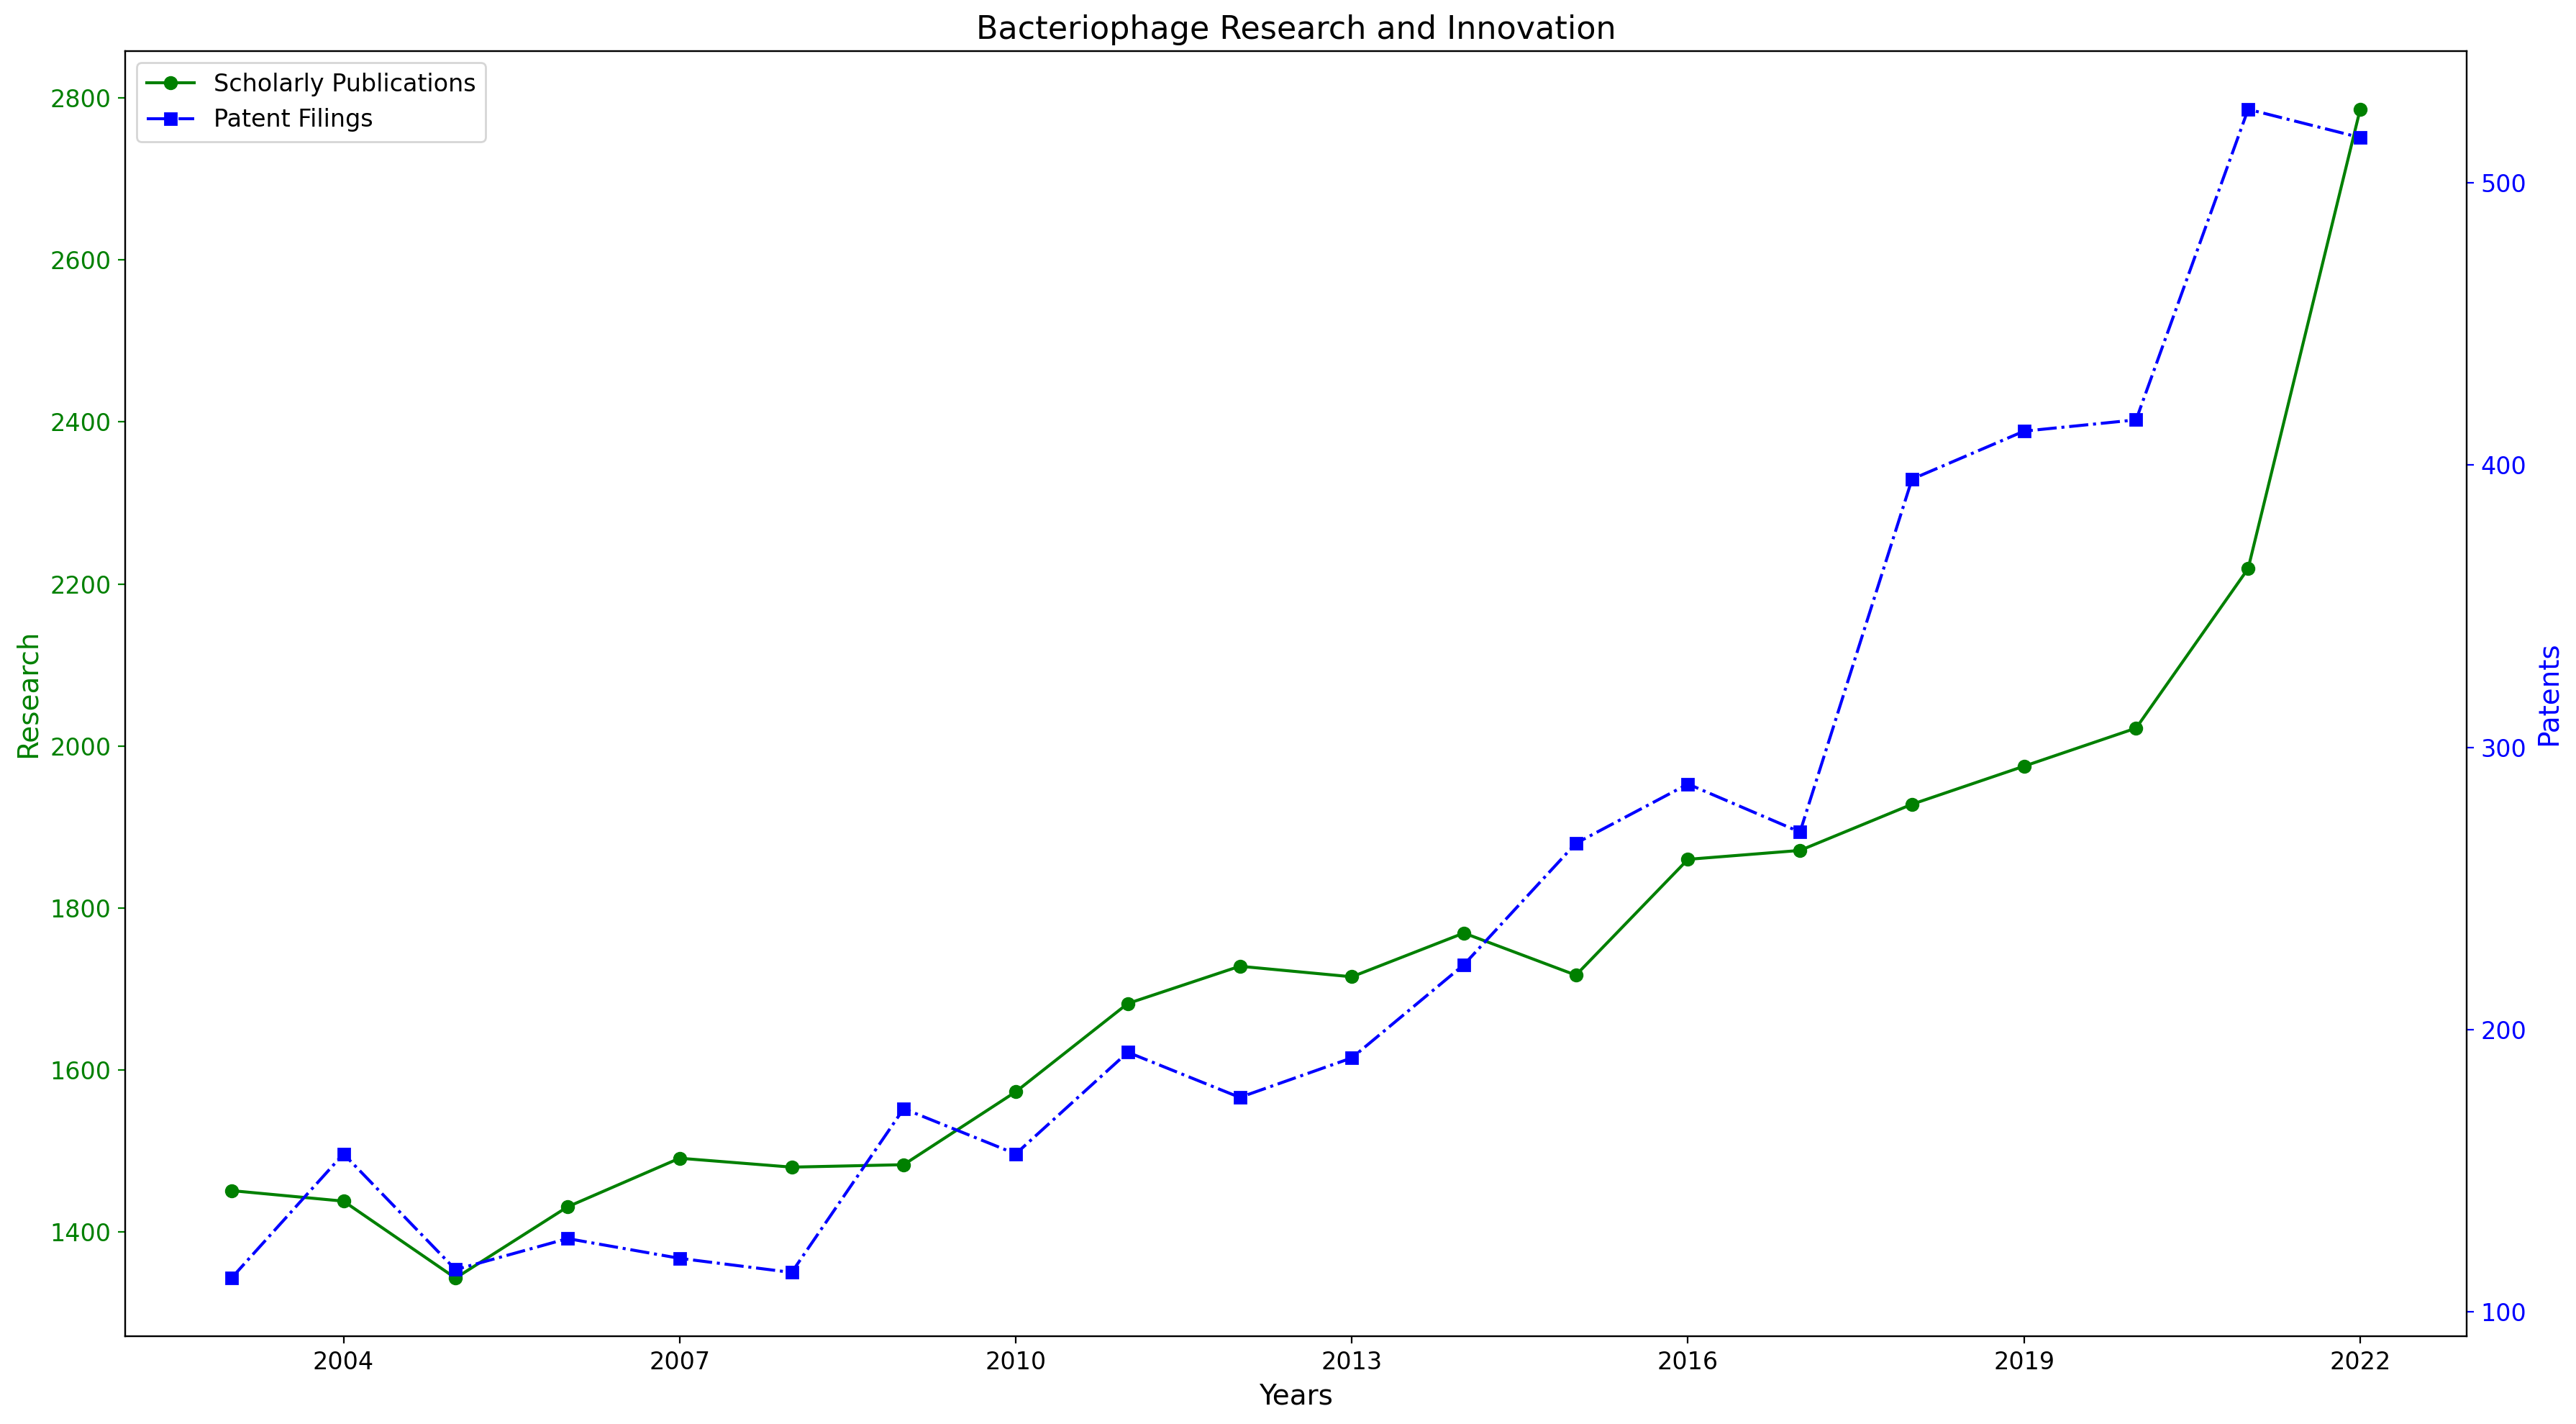

In [103]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Scholarly publications data
years_scholar = data_trend['Year'].to_list()[:-1]  # Truncated for brevity
counts_scholar = data_trend['Publication Count'].to_list()[:-1]   # Truncated for brevity

# Patents data
years_patent = data_trend['Year'].to_list()[:-1]   # Truncated for brevity
counts_patent = [112, 156, 115, 126, 119, 114, 172, 156, 192, 176, 190, 223, 266, 287, 270, 395, 412, 416, 526, 516]    #, 169    # Truncated for brevity

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(18,10))

# Plot the scholarly publications data
ln1 = ax1.plot(years_scholar, counts_scholar, color='g', label='Scholarly Publications', marker='o', linestyle='-')
ax1.set_xlabel('Years', fontsize=14)
ax1.set_ylabel('Research', color='g', fontsize=14)
ax1.tick_params('y', colors='g', labelsize=12)
ax1.tick_params('x', labelsize=12)
ax1.set_title('Bacteriophage Research and Innovation', fontsize=16)

# Annotate specific points for scholarly data
#ax1.annotate('Watershed moment: Publications triple', xy=(1991, 1289), xytext=(1995, 800),
 #            arrowprops=dict(facecolor='black', arrowstyle='->'),
  #           fontsize=10, backgroundcolor='white')

# Create the second axis object for patent data
ax2 = ax1.twinx()
ln2 = ax2.plot(years_patent, counts_patent, color='b', label='Patent Filings', marker='s', linestyle='-.')
ax2.set_ylabel('Patents', color='b', fontsize=14)
ax2.tick_params('y', colors='b', labelsize=12)

# Annotate specific points for patent data
#ax2.annotate('Milestone: Patents cross 400', xy=(2020, 415), xytext=(2010, 500),
             #arrowprops=dict(facecolor='black', arrowstyle='->'),
             #fontsize=10, backgroundcolor='white')

# Improve the legend for better readability
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=2, fontsize=12)

# Display the combined graph with gridlines
#ax1.grid(True, which="both", ls="--", c='0.7', linewidth=0.5)
# Set integer ticks on the x-axis
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

# plt.tight_layout()
plt.savefig('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Bacteriophage Research and Innovation trend.png', dpi=600)
plt.show()


In [131]:
# Patents data
years_patent = data_trend['Year'].to_list()[:-1]   # Truncated for brevity
counts_patent = [112, 156, 115, 126, 119, 114, 172, 156, 192, 176, 190, 223, 266, 287, 270, 395, 412, 416, 526, 516]    #, 169    # Truncated for brevity

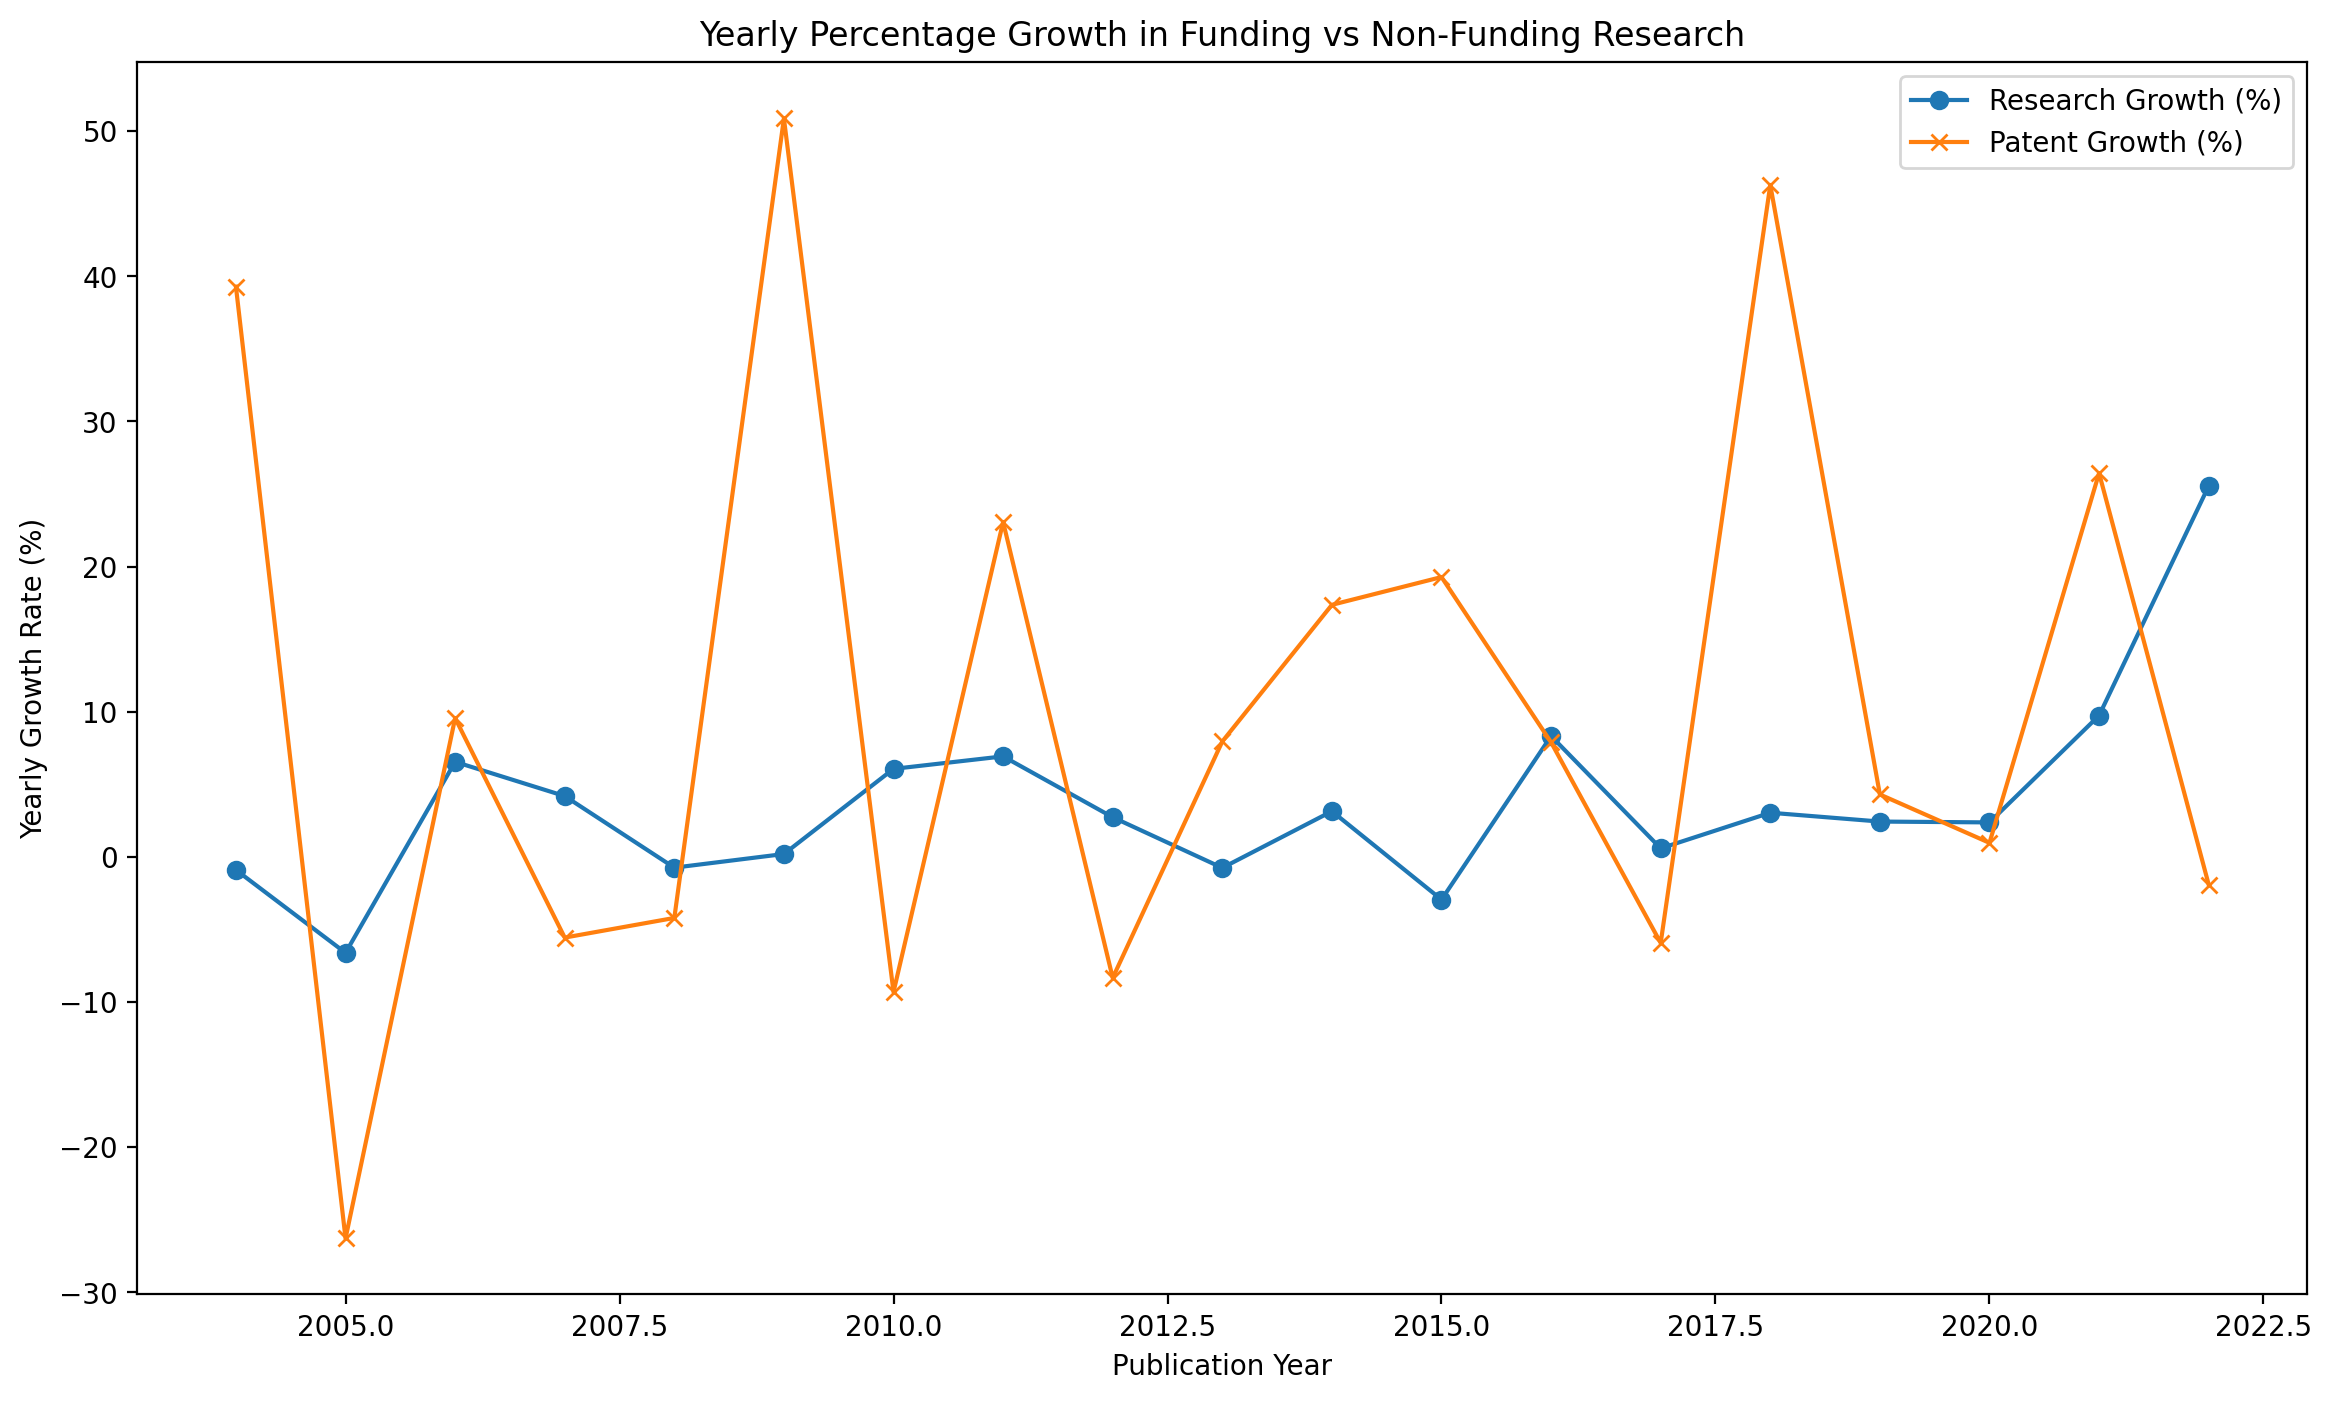

In [130]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
df = data_trend.iloc[:-1, :]

plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['Publication Count'].pct_change()*100, label='Research Growth (%)', marker='o')
plt.plot(df['Year'], pd.DataFrame(counts_patent).pct_change()*100, label='Patent Growth (%)', marker='x')

plt.title("Yearly Percentage Growth in Research and Patent")
plt.xlabel("Publication Year")
plt.ylabel("Yearly Growth Rate (%)")
plt.legend()
#plt.grid(True)
plt.show()


# countries, region and income

## import data

In [11]:
#Import data
country_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_all.pkl').reset_index()
# Filter based on 'Publication Year' column
country_data = country_data[country_data['Publication Year'] >= 2003]
country_data = country_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
#country_data#.head()

In [12]:
import pandas as pd

# Assuming you have your DataFrame loaded as df
# Example:
# df = pd.read_csv('your_data.csv')
country_data_with_Global_North = country_data.copy()
# List of Global South countries
global_south = ['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bhutan',
                'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
                'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Cuba', "Democratic People's Republic of Korea",
                'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
                'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
                'Iran',  'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Lao',  'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
                'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Micronesia',  'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru',
                'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Qatar', 'Rwanda',
                'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Seychelles',
                'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname',
                'Swaziland', 'Syrian',  'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Uganda',
                'United Arab Emirates', 'Tanzania', 'Uruguay', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe',
               'Congo Republic','North Korea','DR Congo','Laos','Micronesia, Fed. Sts.','St. Kitts and Nevis','St. Lucia','St. Vincent and the Grenadines',
                'Eswatini','Vietnam','Syria','Palestine',"Cote d'Ivoire",'Cabo Verde']


# Determine Global North columns
global_north_columns = [col for col in country_data_with_Global_North.columns if col not in global_south and col != 'Addresses']

# Create a new column for Global North
country_data_with_Global_North['Global North'] = country_data_with_Global_North[global_north_columns].sum(axis=1)

# Create a new column for Global North without United States
global_north_without_us_columns = [col for col in global_north_columns if col != 'United States']
country_data_with_Global_North['Global North Without US'] = country_data_with_Global_North[global_north_without_us_columns].sum(axis=1)

# Replace zeros with NaN in the new columns
country_data_with_Global_North['Global North'].replace(0, np.nan, inplace=True)
country_data_with_Global_North['Global North Without US'].replace(0, np.nan, inplace=True)

# Save the updated DataFrame to a new CSV file
country_data_with_Global_North.to_csv('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/updated_country_data_with_Global_North.csv', index=False)

# Now df should have two new columns, one for 'Global North' and another for 'Global North Without US'
#country_data_with_Global_North

In [13]:
citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
#citation_data

In [14]:
country_data_citation = pd.concat([country_data, citation_data], axis=1)
# Drop columns where all elements are NaN
country_data_citation.dropna(axis=1, how='all', inplace=True)
#country_data_citation#.head(2)

In [15]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in country_data_citation.columns[:-1]:
    publication_counts[column] = country_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['Country', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['Country', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['Country', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='Country', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='Country', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('Country')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_count_citation_list.csv')

final_merged_df#.head(60)

Country  Publication Count  Total Citation  Average Citation Count  \
0        Addresses              37645       1170299.0               32.371625   
1    United States              13984        588538.0               43.832427   
2          Albania                  4           113.0               28.250000   
3          Algeria                  4           133.0               33.250000   
4        Argentina                220          5241.0               24.721698   
..             ...                ...             ...                     ...   
143      Venezuela                 11           155.0               14.090909   
144        Vietnam                 89          1798.0               20.431818   
145          Yemen                  2            32.0               16.000000   
146         Zambia                  6           123.0               20.500000   
147       Zimbabwe                  4            77.0               19.250000   

              %  
0    100.000000  
1     37.147031  
2      0.010626  
3      0.010626  
4      0.584407  
..          ...  
143    0.029220  
144    0.236419  
145    0.005313  
146    0.015938  
147    0.010626  

[148 rows x 5 columns]

In [16]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame
# Sample data for demonstration; replace with your actual DataFrame
df = final_merged_df.drop(0)

# Create the Choropleth Map
fig = px.choropleth(df,
                    locations="Country",  # DataFrame column with country names
                    locationmode='country names',  # Set to recognize country names
                    color="Publication Count",  # DataFrame column to color map by
                    hover_name="Country",  # Hover will display country name
                    color_continuous_scale='Viridis',  # Color scheme
                    title="Global Distribution of Bacteriophage Research Publications")  # Map title

# Save the figure
fig.write_html("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Choropleth_Map_Publications.html")  # Save as HTML
#fig.write_image("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Choropleth_Map_Publications.png")  # Save as PNG (Requires the `kaleido` package)

# Show the figure
fig.show()


In [17]:
pip install -U kaleido

Logarithmic Scale: This allows countries with lower counts to be more easily distinguished, offering a fuller story.

In [18]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Sample data; replace with your DataFrame
df = final_merged_df.drop(0)

# Apply a logarithmic transformation to 'Publication Count'
df['Log Publication Count'] = np.log(df['Publication Count'] + 1)  # Added 1 to avoid log(0)

# Create the Choropleth Map
fig = px.choropleth(df,
                    locations="Country",
                    locationmode='country names',
                    color="Log Publication Count",  # Use the logarithmically scaled count
                    hover_name="Country",
                    hover_data=['Publication Count', 'Total Citation', 'Average Citation Count'],  # Show original count and other metrics on hover
                    color_continuous_scale='Viridis',
                    title="Global Distribution of Bacteriophage Research Publications")

# Add annotations for major countries or outliers
annotations = [
    dict(
        x=0.82,
        y=0.9,
        xref="paper",
        yref="paper",
        #text="United States leads with 13,984 publications.",
        #showarrow=False
    )
]

fig.update_layout(annotations=annotations)

# Save the figure
fig.write_html("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Choropleth_Map_Publications_Log_Scale.html")  # Save as HTML
#fig.write_image("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Choropleth_Map_Publications_Log_Scale.png")  # Save as PNG (Requires the `kaleido` package)

# Show the figure
fig.show()


In [19]:
import pandas as pd

# Sample data; replace this with your DataFrame
df = final_merged_df.drop(0)

# List of Global South countries
global_south = ['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bhutan',
                'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
                'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Cuba', "Democratic People's Republic of Korea",
                'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
                'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
                'Iran',  'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Lao',  'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
                'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Micronesia',  'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru',
                'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Qatar', 'Rwanda',
                'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Seychelles',
                'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname',
                'Swaziland', 'Syrian',  'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Uganda',
                'United Arab Emirates', 'Tanzania', 'Uruguay', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe',
               'Congo Republic','North Korea','DR Congo','Laos','Micronesia, Fed. Sts.','St. Kitts and Nevis','St. Lucia','St. Vincent and the Grenadines',
                'Eswatini','Vietnam','Syria','Palestine',"Cote d'Ivoire",'Cabo Verde']

# Create a new column 'Region' in the DataFrame and categorize countries
df['Region'] = df['Country'].apply(lambda x: 'Global South' if x in global_south else 'Global North')

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/updated_data_with_region.csv', index=False)

# Display the updated DataFrame
df


Country  Publication Count  Total Citation  Average Citation Count  \
1    United States              13984        588538.0               43.832427   
2          Albania                  4           113.0               28.250000   
3          Algeria                  4           133.0               33.250000   
4        Argentina                220          5241.0               24.721698   
5          Armenia                 14            85.0                6.071429   
..             ...                ...             ...                     ...   
143      Venezuela                 11           155.0               14.090909   
144        Vietnam                 89          1798.0               20.431818   
145          Yemen                  2            32.0               16.000000   
146         Zambia                  6           123.0               20.500000   
147       Zimbabwe                  4            77.0               19.250000   

             %        Region  
1    37.147031  Global North  
2     0.010626  Global North  
3     0.010626  Global South  
4     0.584407  Global South  
5     0.037190  Global North  
..         ...           ...  
143   0.029220  Global South  
144   0.236419  Global South  
145   0.005313  Global South  
146   0.015938  Global South  
147   0.010626  Global South  

[147 rows x 6 columns]

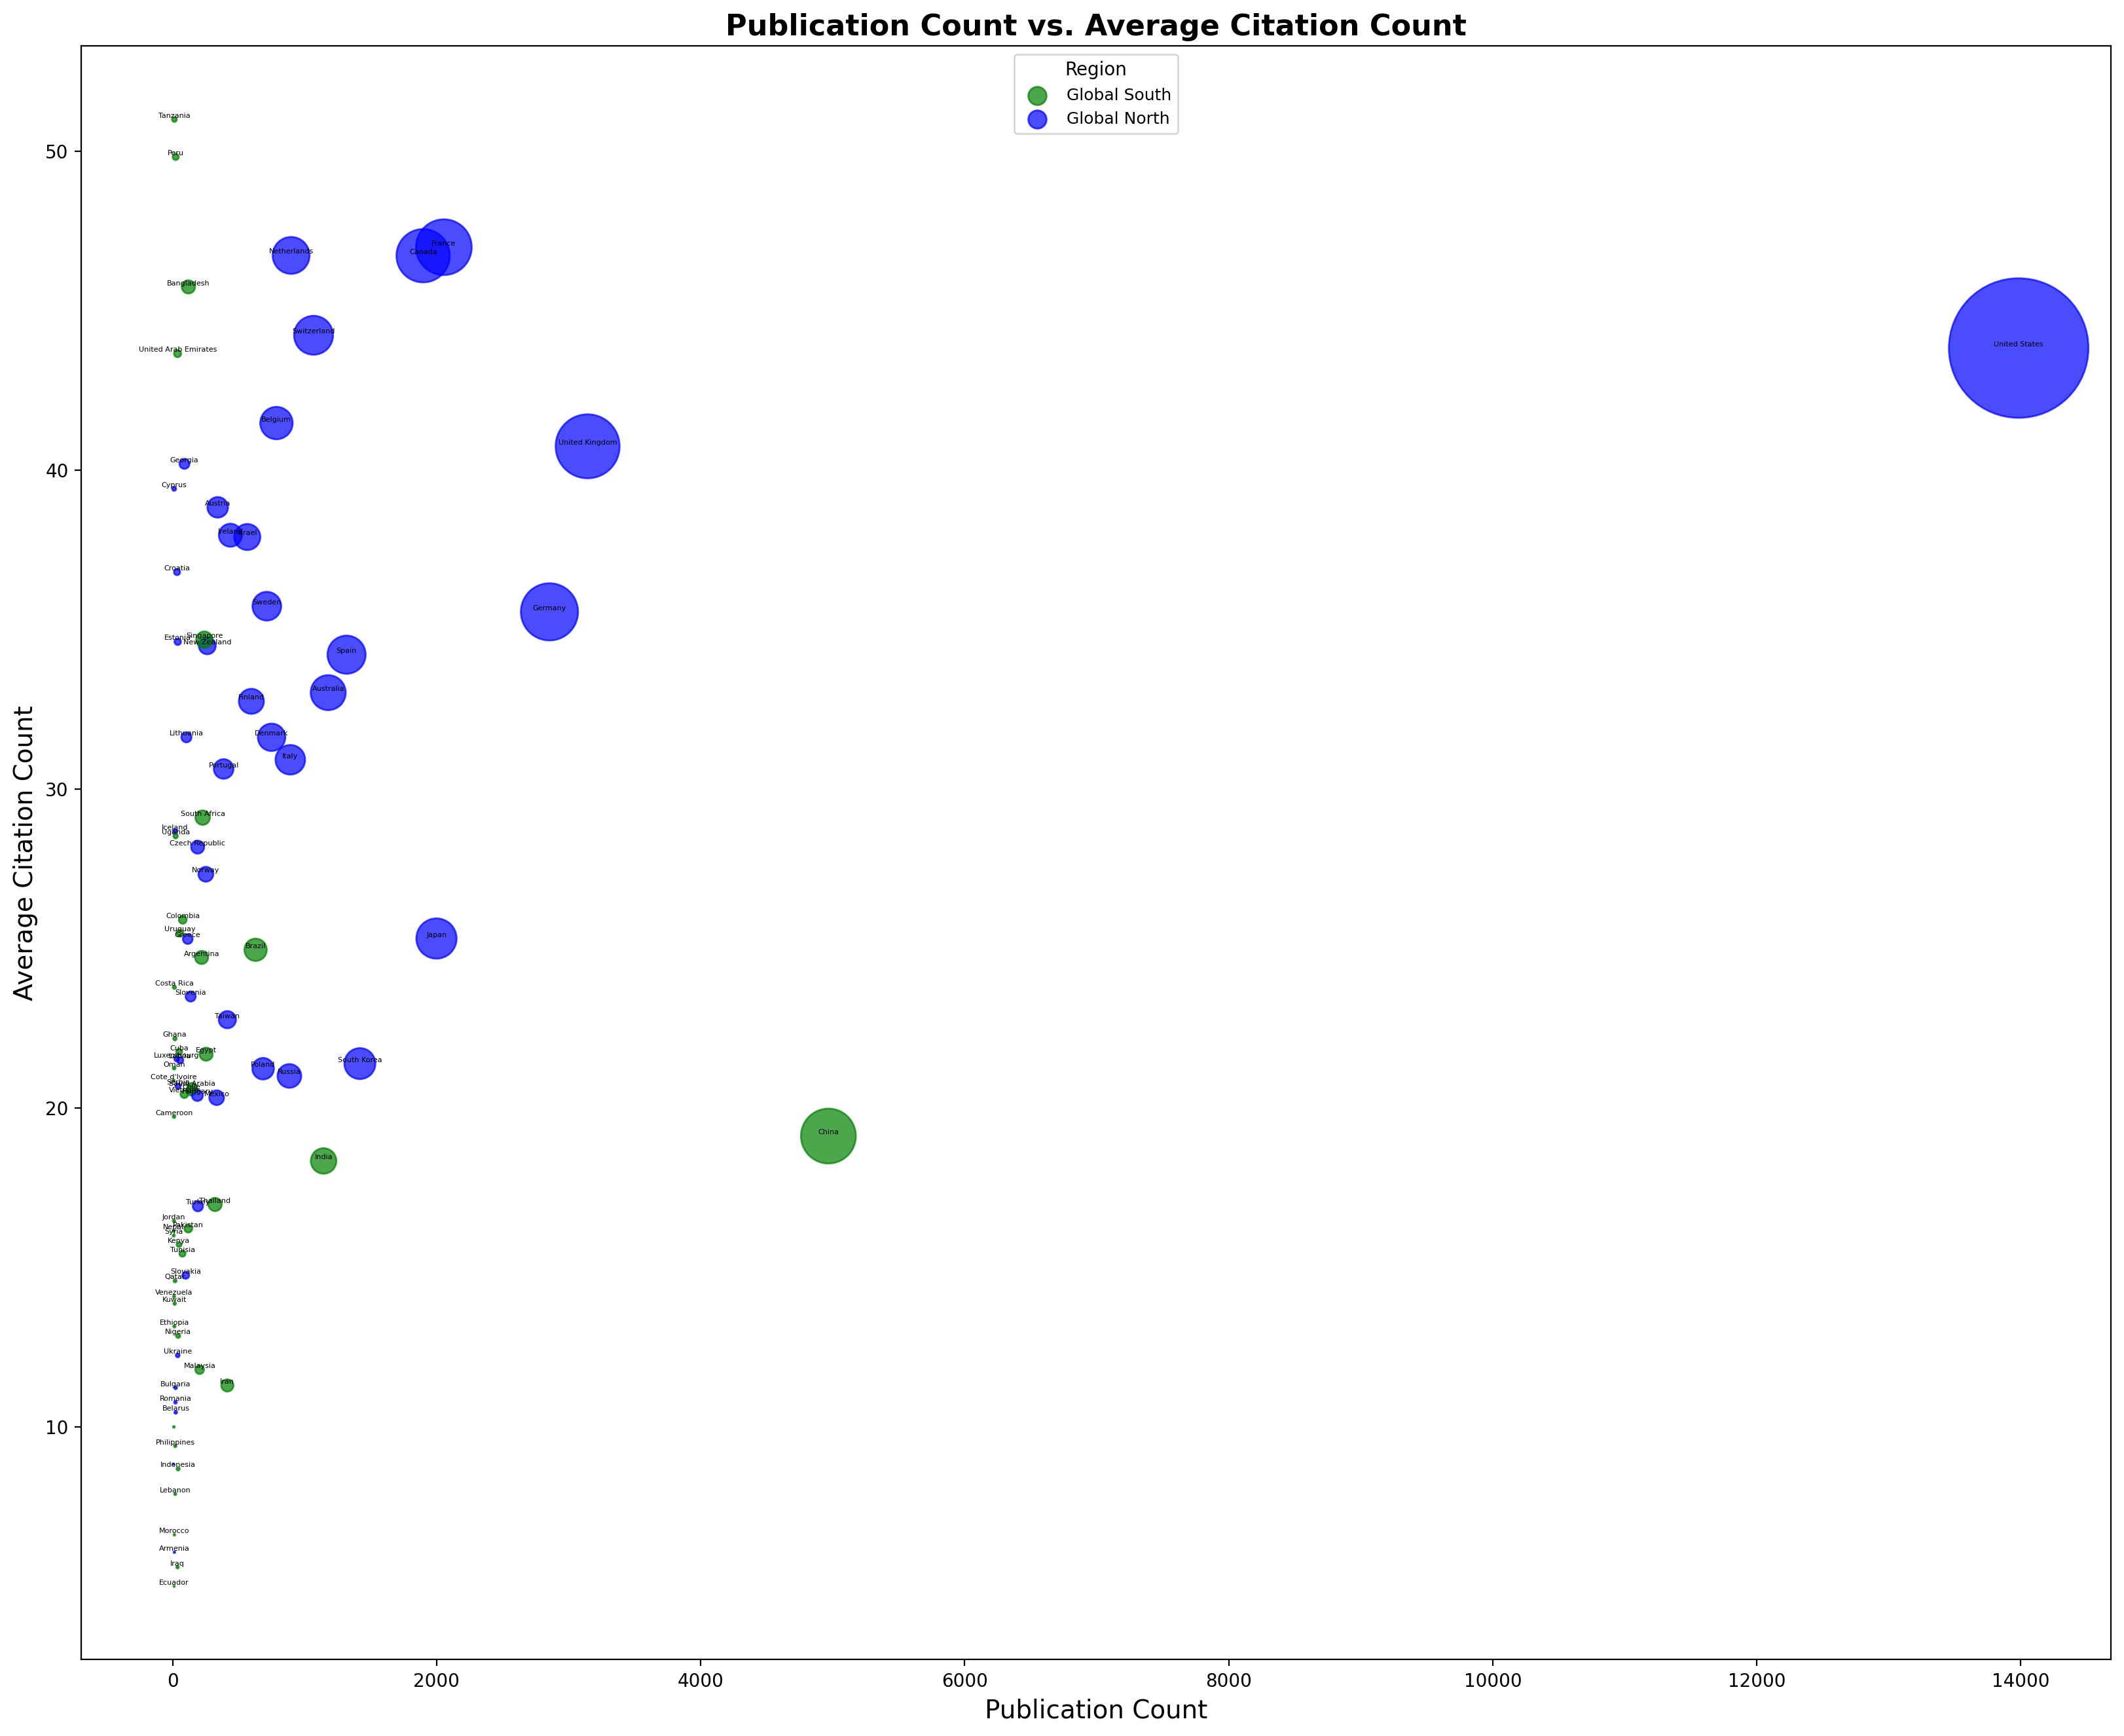

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data; replace this with your DataFrame
# df = pd.read_csv('your_data.csv')

# Filter the data to only include rows where 'Publication Count' is greater than 9
df_filtered = df[df['Publication Count'] > 6]

# Create a color map based on the 'Region' column
colors = df_filtered['Region'].apply(lambda x: 'green' if x == 'Global South' else 'blue')

# Create a new figure
plt.figure(figsize=(20, 16))

# Create the scatter plot
sc = plt.scatter(df_filtered['Publication Count'], df_filtered['Average Citation Count'],
                 c=colors,  # Use the colors we mapped
                 s=df_filtered['Total Citation'] / 100,  # Adjust the scaling factor
                 alpha=0.7,
                 #label='Countries'
                 )

# Add titles and labels with bold text
plt.title('Publication Count vs. Average Citation Count', fontweight='bold', fontsize=16)
plt.xlabel('Publication Count', fontsize=14) #fontweight='bold',
plt.ylabel('Average Citation Count', fontsize=14) #fontweight='bold',

# Label some of the significant countries or outliers
for i, row in df_filtered.iterrows():
    if row['Publication Count'] > 10 or row['Average Citation Count'] > 10:  # You can set your own conditions
        plt.annotate(row['Country'], (row['Publication Count'], row['Average Citation Count']),
                     textcoords="offset points", xytext=(0,1), ha='center', fontsize=4)#, fontweight='bold')

# Add a legend manually to represent Global North and South
plt.scatter([], [], c='green', alpha=0.7, s=100, label='Global South')
plt.scatter([], [], c='blue', alpha=0.7, s=100, label='Global North')
plt.legend(loc='upper center', title='Region', fontsize=9)

# Save the figure
plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Scatter_Plot_Publication_vs_Avg_Citation.png", dpi=600)

# Show the plot
plt.show()


In [21]:
# Reset the index to make 'Publication Year' a regular column
country_data2 = country_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
country_data2['Year Group'] = pd.cut(country_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
country_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(country_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='Country', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'Country']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['Publication']

# Rename columns
grouped.columns = ['Year Group', 'Country', 'Publication Count',	'Total Citation', 'Average Citation Count']

#grouped

In [22]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='Country', columns='Year Group', values=['Publication Count',	'Total Citation', 'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count                                         \
Year Group      [2003, 2008) [2008, 2013) [2013, 2018) [2018, 2023)   
Country                                                               
Albania                  0.0          0.0          2.0          2.0   
Algeria                  1.0          0.0          2.0          1.0   
Argentina               38.0         49.0         58.0         73.0   
Armenia                  1.0          2.0          3.0          8.0   
Australia              185.0        224.0        286.0        442.0   
...                      ...          ...          ...          ...   
Venezuela                4.0          2.0          0.0          4.0   
Vietnam                  6.0         10.0         23.0         47.0   
Yemen                    0.0          1.0          0.0          1.0   
Zambia                   4.0          1.0          0.0          1.0   
Zimbabwe                 1.0          1.0          1.0          1.0   

                        Total Citation                                         \
Year Group [2023, 2028)   [2003, 2008) [2008, 2013) [2013, 2018) [2018, 2023)   
Country                                                                         
Albania             0.0            0.0          0.0         96.0         17.0   
Algeria             0.0           82.0          0.0         49.0          2.0   
Argentina           2.0         1980.0       1514.0       1140.0        607.0   
Armenia             0.0            8.0          4.0         13.0         60.0   
Australia          42.0        10540.0      10867.0       9014.0       6671.0   
...                 ...            ...          ...          ...          ...   
Venezuela           1.0           92.0         43.0          0.0         20.0   
Vietnam             3.0          197.0        387.0        569.0        644.0   
Yemen               0.0            0.0         20.0          0.0         12.0   
Zambia              0.0          109.0         13.0          0.0          1.0   
Zimbabwe            0.0           11.0         46.0         11.0          9.0   

                        Average Citation Count                            \
Year Group [2023, 2028)           [2003, 2008) [2008, 2013) [2013, 2018)   
Country                                                                    
Albania             0.0               0.000000     0.000000    48.000000   
Algeria             0.0              82.000000     0.000000    24.500000   
Argentina           0.0              52.105263    30.897959    19.655172   
Armenia             0.0               8.000000     2.000000     4.333333   
Australia          62.0              56.972973    48.513393    31.517483   
...                 ...                    ...          ...          ...   
Venezuela           0.0              23.000000    21.500000     0.000000   
Vietnam             1.0              32.833333    38.700000    24.739130   
Yemen               0.0               0.000000    20.000000     0.000000   
Zambia              0.0              27.250000    13.000000     0.000000   
Zimbabwe            0.0              11.000000    46.000000    11.000000   

                                      
Year Group [2018, 2023) [2023, 2028)  
Country                               
Albania        8.500000     0.000000  
Algeria        2.000000     0.000000  
Argentina      8.315068     0.000000  
Armenia        7.500000     0.000000  
Australia     15.092760     1.476190  
...                 ...          ...  
Venezuela      5.000000     0.000000  
Vietnam       13.702128     0.333333  
Yemen         12.000000     0.000000  
Zambia         1.000000     0.000000  
Zimbabwe       9.000000     0.000000  

[147 rows x 15 columns]

In [23]:
import pandas as pd

# Sample data; replace this with your DataFrame
df = pivot_df.reset_index()

# List of Global South countries
global_south = ['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bhutan',
                'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
                'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Cuba', "Democratic People's Republic of Korea",
                'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
                'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
                'Iran',  'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Lao',  'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
                'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Micronesia',  'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru',
                'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Qatar', 'Rwanda',
                'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Seychelles',
                'Sierra Leone', 'Singapore', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname',
                'Swaziland', 'Syrian',  'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Uganda',
                'United Arab Emirates', 'Tanzania', 'Uruguay', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe',
               'Congo Republic','North Korea','DR Congo','Laos','Micronesia, Fed. Sts.','St. Kitts and Nevis','St. Lucia','St. Vincent and the Grenadines',
                'Eswatini','Vietnam','Syria','Palestine',"Cote d'Ivoire",'Cabo Verde']

# Create a new column 'Region' in the DataFrame and categorize countries
df['Region'] = df['Country'].apply(lambda x: 'Global South' if x in global_south else 'Global North')

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/updated_countries_list_count_citation_group_year.csv', index=False)

# Display the updated DataFrame
# Replace NaN values with 0 in-place
df.fillna(0)


Country Publication Count                            \
Year Group                 [2003, 2008) [2008, 2013) [2013, 2018)   
0             Albania               0.0          0.0          2.0   
1             Algeria               1.0          0.0          2.0   
2           Argentina              38.0         49.0         58.0   
3             Armenia               1.0          2.0          3.0   
4           Australia             185.0        224.0        286.0   
..                ...               ...          ...          ...   
142         Venezuela               4.0          2.0          0.0   
143           Vietnam               6.0         10.0         23.0   
144             Yemen               0.0          1.0          0.0   
145            Zambia               4.0          1.0          0.0   
146          Zimbabwe               1.0          1.0          1.0   

                                     Total Citation                            \
Year Group [2018, 2023) [2023, 2028)   [2003, 2008) [2008, 2013) [2013, 2018)   
0                   2.0          0.0            0.0          0.0         96.0   
1                   1.0          0.0           82.0          0.0         49.0   
2                  73.0          2.0         1980.0       1514.0       1140.0   
3                   8.0          0.0            8.0          4.0         13.0   
4                 442.0         42.0        10540.0      10867.0       9014.0   
..                  ...          ...            ...          ...          ...   
142                 4.0          1.0           92.0         43.0          0.0   
143                47.0          3.0          197.0        387.0        569.0   
144                 1.0          0.0            0.0         20.0          0.0   
145                 1.0          0.0          109.0         13.0          0.0   
146                 1.0          0.0           11.0         46.0         11.0   

                                     Average Citation Count               \
Year Group [2018, 2023) [2023, 2028)           [2003, 2008) [2008, 2013)   
0                  17.0          0.0               0.000000     0.000000   
1                   2.0          0.0              82.000000     0.000000   
2                 607.0          0.0              52.105263    30.897959   
3                  60.0          0.0               8.000000     2.000000   
4                6671.0         62.0              56.972973    48.513393   
..                  ...          ...                    ...          ...   
142                20.0          0.0              23.000000    21.500000   
143               644.0          1.0              32.833333    38.700000   
144                12.0          0.0               0.000000    20.000000   
145                 1.0          0.0              27.250000    13.000000   
146                 9.0          0.0              11.000000    46.000000   

                                                         Region  
Year Group [2013, 2018) [2018, 2023) [2023, 2028)                
0             48.000000     8.500000     0.000000  Global North  
1             24.500000     2.000000     0.000000  Global South  
2             19.655172     8.315068     0.000000  Global South  
3              4.333333     7.500000     0.000000  Global North  
4             31.517483    15.092760     1.476190  Global North  
..                  ...          ...          ...           ...  
142            0.000000     5.000000     0.000000  Global South  
143           24.739130    13.702128     0.333333  Global South  
144            0.000000    12.000000     0.000000  Global South  
145            0.000000     1.000000     0.000000  Global South  
146           11.000000     9.000000     0.000000  Global South  

[147 rows x 17 columns]

In [24]:
# Convert all levels of multi-index columns to strings
df.columns = df.columns.map(lambda x: tuple(map(str, x)))
# Check the new column names
#print(df.columns)

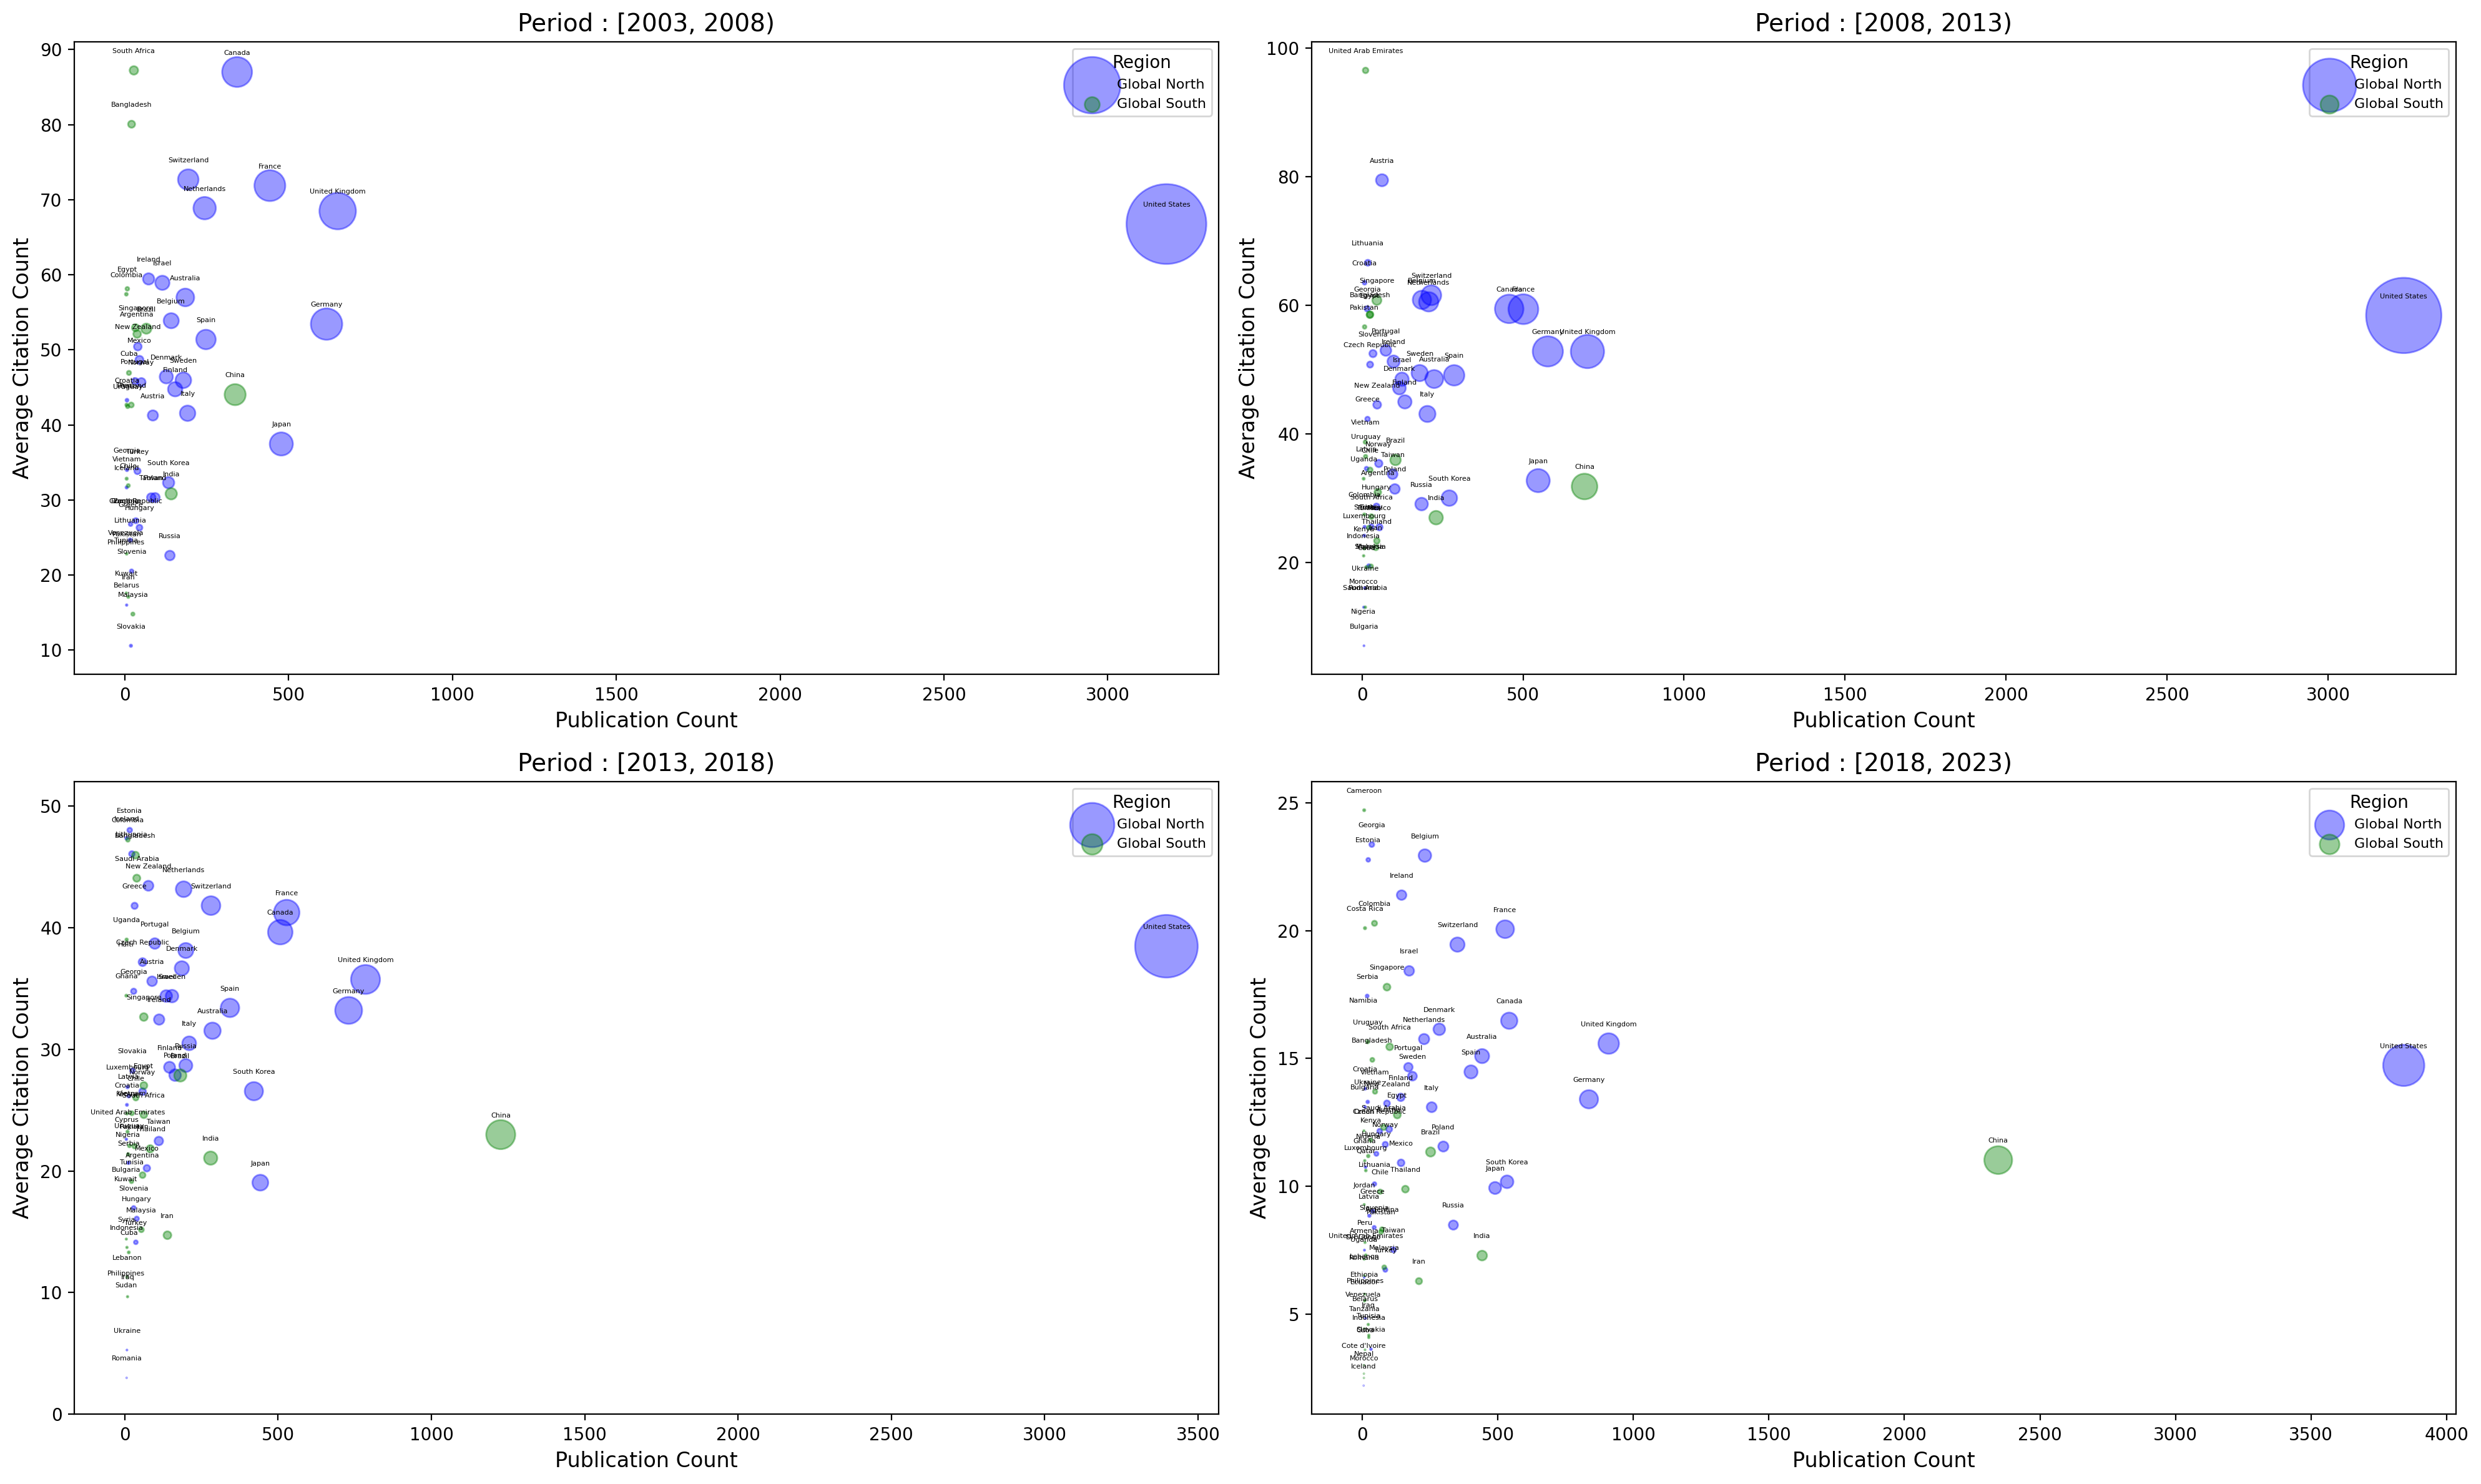

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Assume df is your DataFrame

time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)']
color_map = {'Global North': 'blue', 'Global South': 'green'}

# Initialize subplot
fig, axes = plt.subplots(math.ceil(len(time_periods) / 2), 2, figsize=(20, 12))
axes = axes.flatten()

for idx, period in enumerate(time_periods):
    ax = axes[idx]

    # Limit y-axis to 100 only for the period '[2013, 2018)'
    if period == '[2013, 2018)':
        ax.set_ylim([0, 52])

    for region, color in color_map.items():
        subset = df[df['Region'] == region]
        # Filter countries with less than 2 publications
        subset = subset[subset[('Publication Count', period)] >= 5]

        x_data = subset[('Publication Count', period)]
        y_data = subset[('Average Citation Count', period)]
        size_data = subset[('Total Citation', period)] / 100  # Scale the size data

        ax.scatter(x_data, y_data, s=size_data, color=color, label=region, alpha=0.4)

    ax.set_title(f"Period : {period}", fontsize=14)
    ax.set_xlabel("Publication Count", fontsize=12)
    ax.set_ylabel("Average Citation Count", fontsize=12)

    # Limit the y-axis (Average Citation Count) to 100
    #ax.set_ylim(0, 100)

    # Adding a legend
    ax.legend(title='Region', fontsize=8)

    for i, txt in enumerate(df['Country']):
        x = df.loc[i, ('Publication Count', period)]
        y = df.loc[i, ('Average Citation Count', period)]
        if x >= 4:  # Only annotate if there are at least 2 publications
            ax.annotate(txt, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=4)

# Remove any extra subplots
for idx in range(len(time_periods), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Scatter_Plot_Publication_vs_Avg_Citation_period.png", dpi=600)
plt.show()


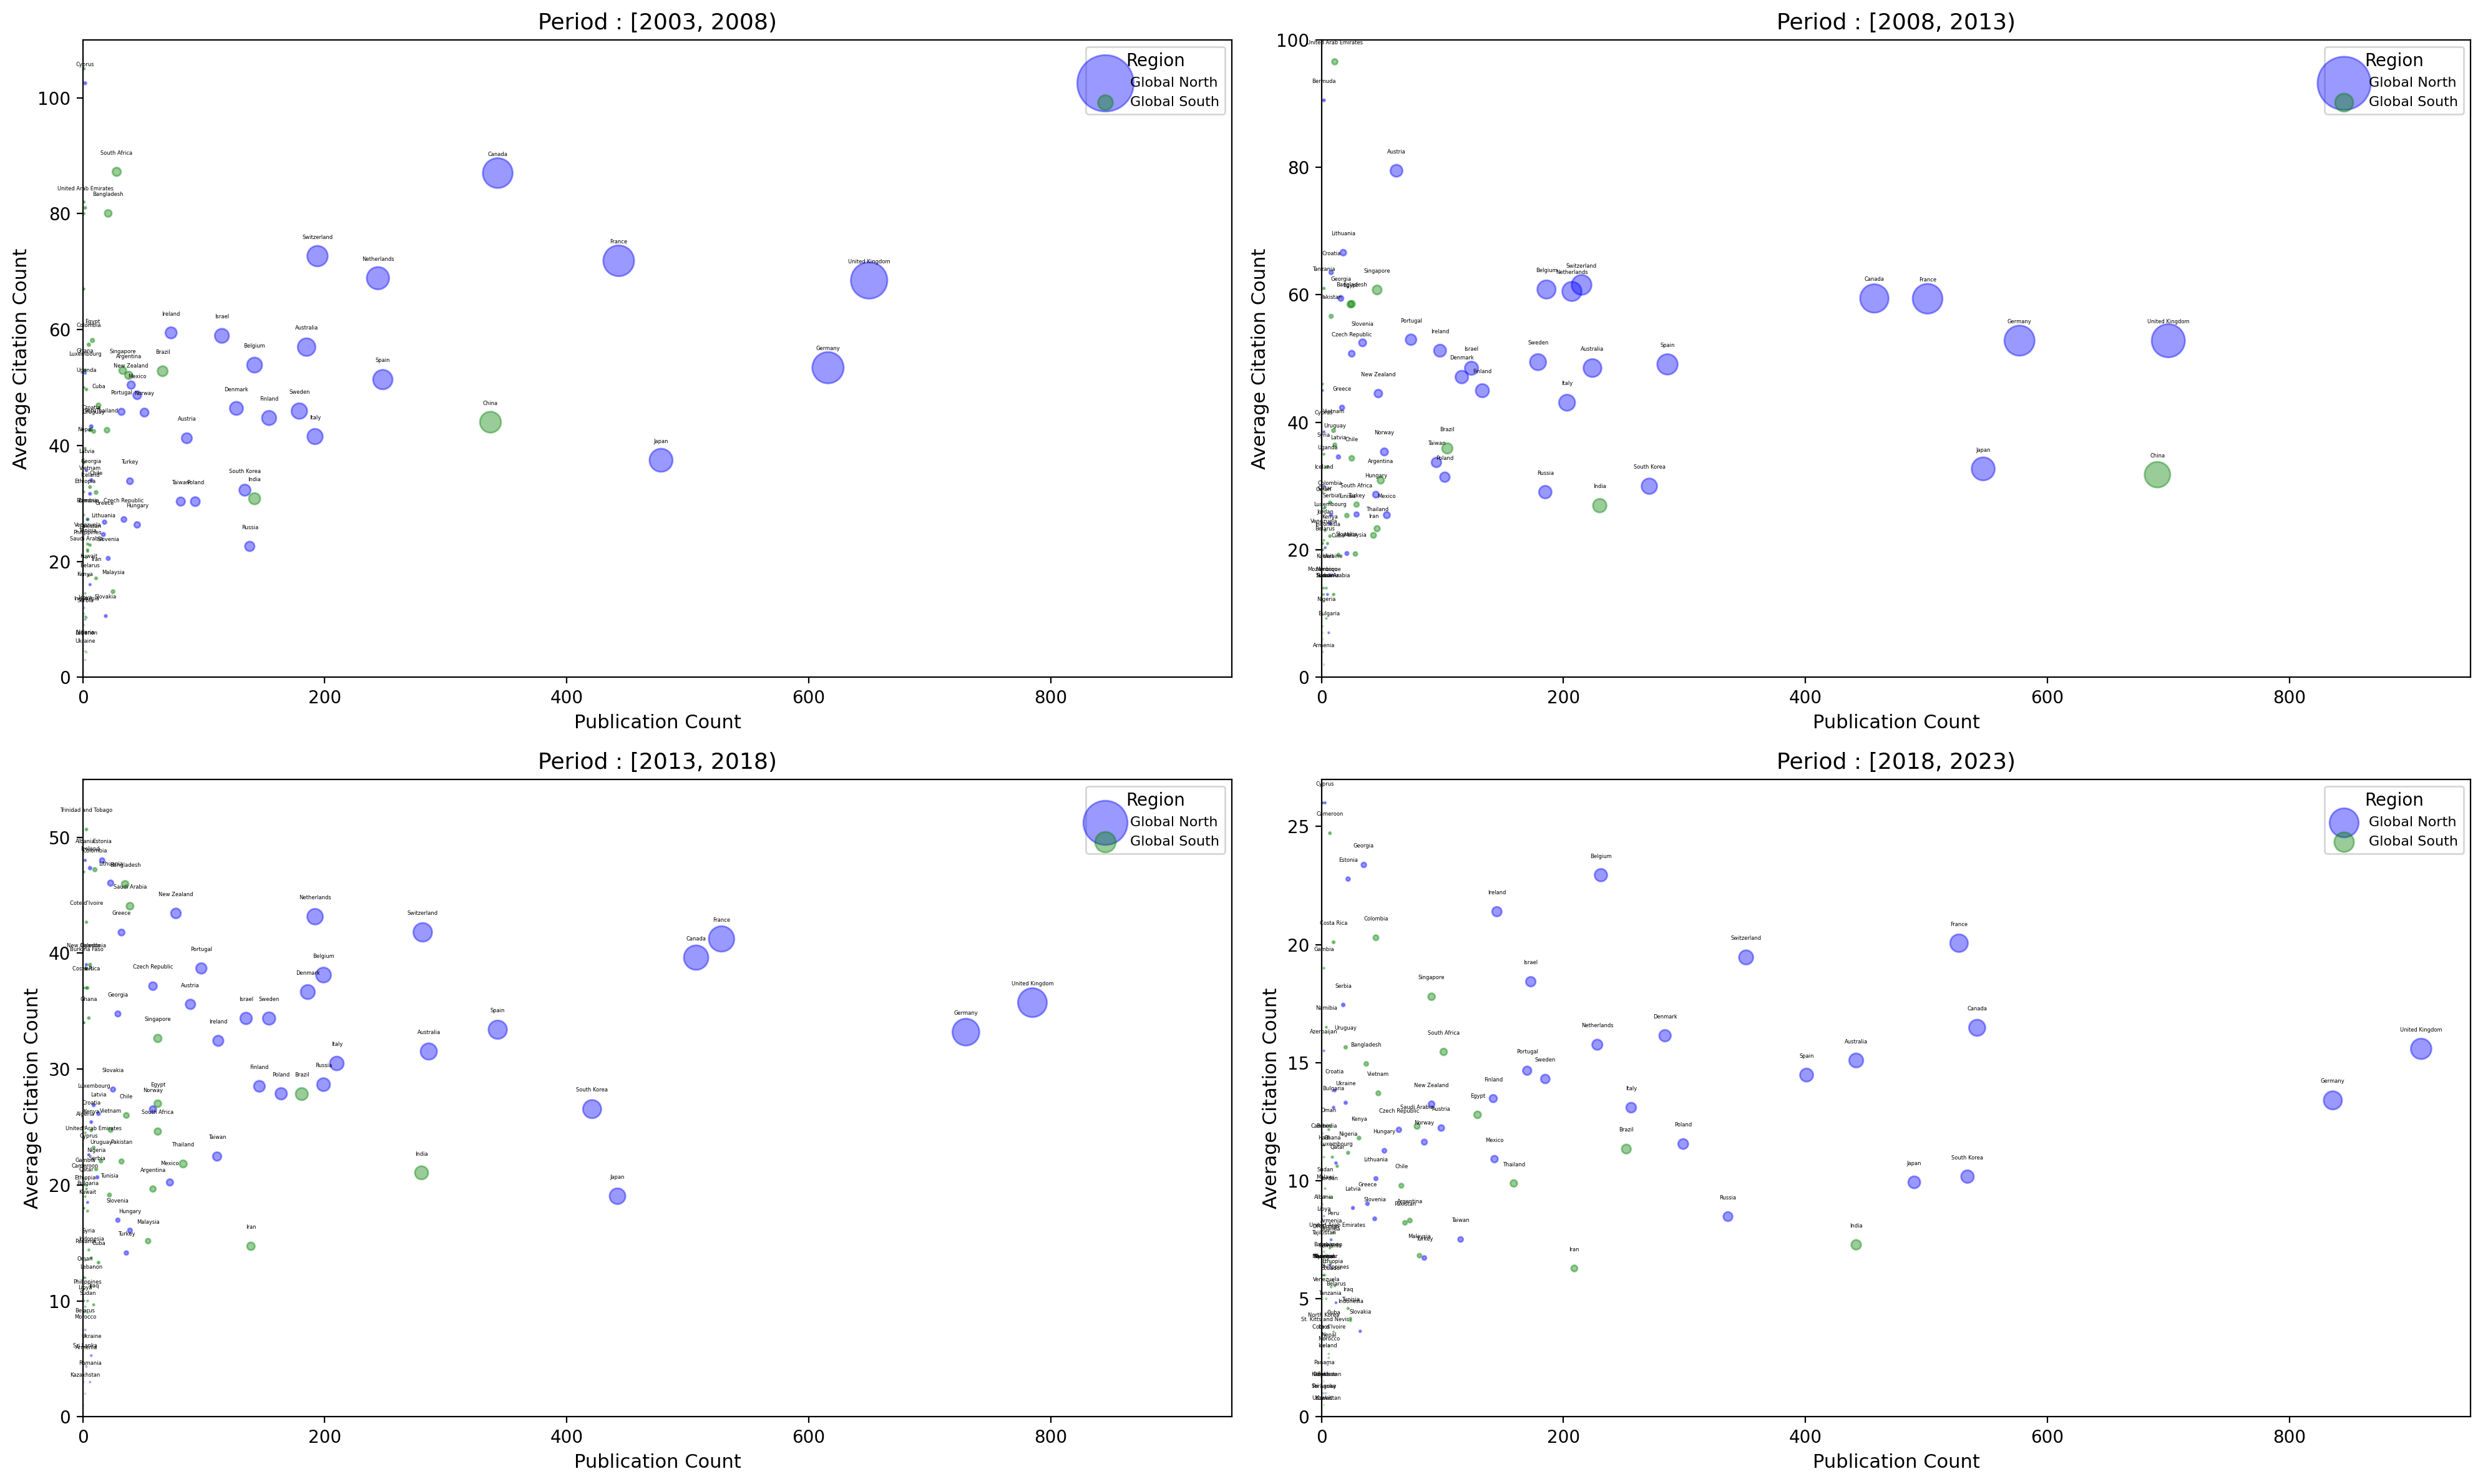

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Assume df is your DataFrame

time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)']
color_map = {'Global North': 'blue', 'Global South': 'green'}

# Initialize subplot
fig, axes = plt.subplots(math.ceil(len(time_periods) / 2), 2, figsize=(20, 12))
axes = axes.flatten()

for idx, period in enumerate(time_periods):
    ax = axes[idx]

    # Limit y-axis to 100 only for the period '[2013, 2018)'
    if period == '[2013, 2018)':
        ax.set_ylim([0, 55])
    if period == '[2008, 2013)':
        ax.set_ylim([0, 100])
    if period == '[2018, 2023)':
        ax.set_ylim([0, 27])
    if period == '[2003, 2008)':
        ax.set_ylim([0, 110])

    for region, color in color_map.items():
        subset = df[df['Region'] == region]
        # Filter countries with less than 2 publications
        subset = subset[subset[('Publication Count', period)] >= 1]

        x_data = subset[('Publication Count', period)]
        y_data = subset[('Average Citation Count', period)]
        size_data = subset[('Total Citation', period)] / 100  # Scale the size data

        ax.scatter(x_data, y_data, s=size_data, color=color, label=region, alpha=0.4)

    ax.set_title(f"Period : {period}", fontsize=13)
    ax.set_xlabel("Publication Count", fontsize=11)
    ax.set_ylabel("Average Citation Count", fontsize=11)

    # Limit the y-axis (Average Citation Count) to 100
    ax.set_xlim(0, 950)

    # Adding a legend
    ax.legend(title='Region', fontsize=8)

    for i, txt in enumerate(df['Country']):
        x = df.loc[i, ('Publication Count', period)]
        y = df.loc[i, ('Average Citation Count', period)]
        if x >= 2:  # Only annotate if there are at least 2 publications
            ax.annotate(txt, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=3)

# Remove any extra subplots
for idx in range(len(time_periods), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Scatter_Plot_Publication_vs_Avg_Citation_period2.png", dpi=600)
plt.show()


# region

## UN REGION GROUP

In [27]:
un_region_group = ['Addresses','un_north_africa','un_eastern_africa','un_middle_africa','un_Southern_africa','un_Western_africa',
    'un_Latin_America_and_the_Caribbean','un_Northern_America',
    'un_Central_Asia','un_Eastern_Asia','un_South_eastern_Asia','un_Southern_Asia','un_Western_Asia',
    'un_Eastern_Europe','un_Northern_Europe','un_Southern_Europe','un_Western_Europe',
    'un_Australia_and_New_Zealand','un_Melanesia','un_Micronesia','un_Polynesia']

In [28]:
#Import data
un_region_group_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
un_region_group = [region for region in un_region_group if region in un_region_group_data.columns]#

# Select columns and reset index
un_region_group_data = un_region_group_data[un_region_group].reset_index()

# Rename columns and set index
un_region_group_data = un_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
#un_region_group_data#.head()

In [29]:
un_region_group_data_citation = pd.concat([un_region_group_data, citation_data], axis=1).reset_index()
un_region_group_data_citation = un_region_group_data_citation[un_region_group_data_citation['Publication Year'] >= 2003]
#un_region_group_data_citation#.head(2)

In [30]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in un_region_group_data_citation.columns[:-1]:
    publication_counts[column] = un_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['un_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['un_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['un_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='un_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='un_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('un_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/un_region_count_citation_list.csv')

final_merged_df#.head(60)

un_region  Publication Count  Total Citation  \
0                               wos_ID              37720       1172562.0   
1                     Publication Year              37720       1172562.0   
2                            Addresses              37645       1170299.0   
3                      un_north_africa                359          6715.0   
4                    un_eastern_africa                115          2595.0   
5                     un_middle_africa                 19           407.0   
6                   un_Southern_africa                231          6454.0   
7                    un_Western_africa                 88          1494.0   
8   un_Latin_America_and_the_Caribbean                 68          2096.0   
9                  un_Northern_America              15361        641212.0   
10                     un_Central_Asia                 14            67.0   
11                     un_Eastern_Asia               8244        165900.0   
12               un_South_eastern_Asia                896         17562.0   
13                    un_Southern_Asia               1789         30352.0   
14                     un_Western_Asia               1178         32932.0   
15                   un_Eastern_Europe               2095         40526.0   
16                  un_Northern_Europe               5538        200255.0   
17                  un_Southern_Europe               2794         84610.0   
18                   un_Western_Europe               6942        273361.0   
19        un_Australia_and_New_Zealand               1416         45112.0   
20                        un_Melanesia                  7           177.0   

    Average Citation Count           %  
0                32.389426  100.199230  
1                32.389426  100.199230  
2                32.371625  100.000000  
3                19.634503    0.953646  
4                23.590909    0.305485  
5                21.421053    0.050472  
6                29.336364    0.613627  
7                17.785714    0.233763  
8                30.823529    0.180635  
9                43.445491   40.804888  
10                5.153846    0.037190  
11               20.957554   21.899323  
12               20.279446    2.380130  
13               17.927939    4.752291  
14               29.403571    3.129234  
15               20.478019    5.565148  
16               37.347072   14.711117  
17               31.163904    7.421968  
18               40.420080   18.440696  
19               33.391562    3.761456  
20               29.500000    0.018595

In [31]:
# Reset the index to make 'Publication Year' a regular column
un_region_group_data2 = un_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
un_region_group_data2['Year Group'] = pd.cut(un_region_group_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
un_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(un_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='un_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'un_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['Publication']
# Rename columns
grouped.columns = ['Year Group', 'un_region', 'Publication Count',	'Total Citation', 'Average Citation Count']


#grouped

In [32]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='un_region', columns='Year Group', values=['Publication Count',	'Total Citation', 'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/un_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/un_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count               \
Year Group                              [2003, 2008) [2008, 2013)   
un_region                                                           
index                                         7332.0       8137.0   
un_Australia_and_New_Zealand                   224.0        268.0   
un_Central_Asia                                  0.0          1.0   
un_Eastern_Asia                                939.0       1478.0   
un_Eastern_Europe                              332.0        397.0   
un_Latin_America_and_the_Caribbean              14.0         16.0   
un_Melanesia                                     0.0          1.0   
un_Northern_America                           3422.0       3575.0   
un_Northern_Europe                            1166.0       1225.0   
un_South_eastern_Asia                           89.0        133.0   
un_Southern_Asia                               175.0        299.0   
un_Southern_Europe                             508.0        602.0   
un_Southern_africa                              28.0         29.0   
un_Western_Asia                                179.0        207.0   
un_Western_Europe                             1528.0       1550.0   
un_Western_africa                                6.0          4.0   
un_eastern_africa                               11.0         19.0   
un_middle_africa                                 0.0          1.0   
un_north_africa                                 17.0         51.0   

                                                                           \
Year Group                         [2013, 2018) [2018, 2023) [2023, 2028)   
un_region                                                                   
index                                    9208.0      11729.0       1314.0   
un_Australia_and_New_Zealand              353.0        522.0         49.0   
un_Central_Asia                             2.0         11.0          0.0   
un_Eastern_Asia                          2064.0       3301.0        462.0   
un_Eastern_Europe                         488.0        803.0         75.0   
un_Latin_America_and_the_Caribbean         22.0         16.0          0.0   
un_Melanesia                                4.0          2.0          0.0   
un_Northern_America                      3787.0       4212.0        365.0   
un_Northern_Europe                       1369.0       1615.0        163.0   
un_South_eastern_Asia                     224.0        403.0         47.0   
un_Southern_Asia                          486.0        760.0         69.0   
un_Southern_Europe                        695.0        888.0        101.0   
un_Southern_africa                         63.0        103.0          8.0   
un_Western_Asia                           281.0        456.0         55.0   
un_Western_Europe                        1751.0       1917.0        196.0   
un_Western_africa                          28.0         45.0          5.0   
un_eastern_africa                          23.0         58.0          4.0   
un_middle_africa                            6.0         11.0          1.0   
un_north_africa                            93.0        164.0         34.0   

                                   Total Citation                            \
Year Group                           [2003, 2008) [2008, 2013) [2013, 2018)   
un_region                                                                     
index                                    401050.0     358641.0     276055.0   
un_Australia_and_New_Zealand              12547.0      12845.0      11950.0   
un_Central_Asia                               0.0         45.0          4.0   
un_Eastern_Asia                           36766.0      47094.0      47079.0   
un_Eastern_Europe                          8361.0      11807.0      12813.0   
un_Latin_America_and_the_Caribbean          642.0        896.0        489.0   
un_Melanesia                                  0.0         29.0        142.0   
un_Northern_America            

In [33]:
#pivot_df.drop('index').reset_index()

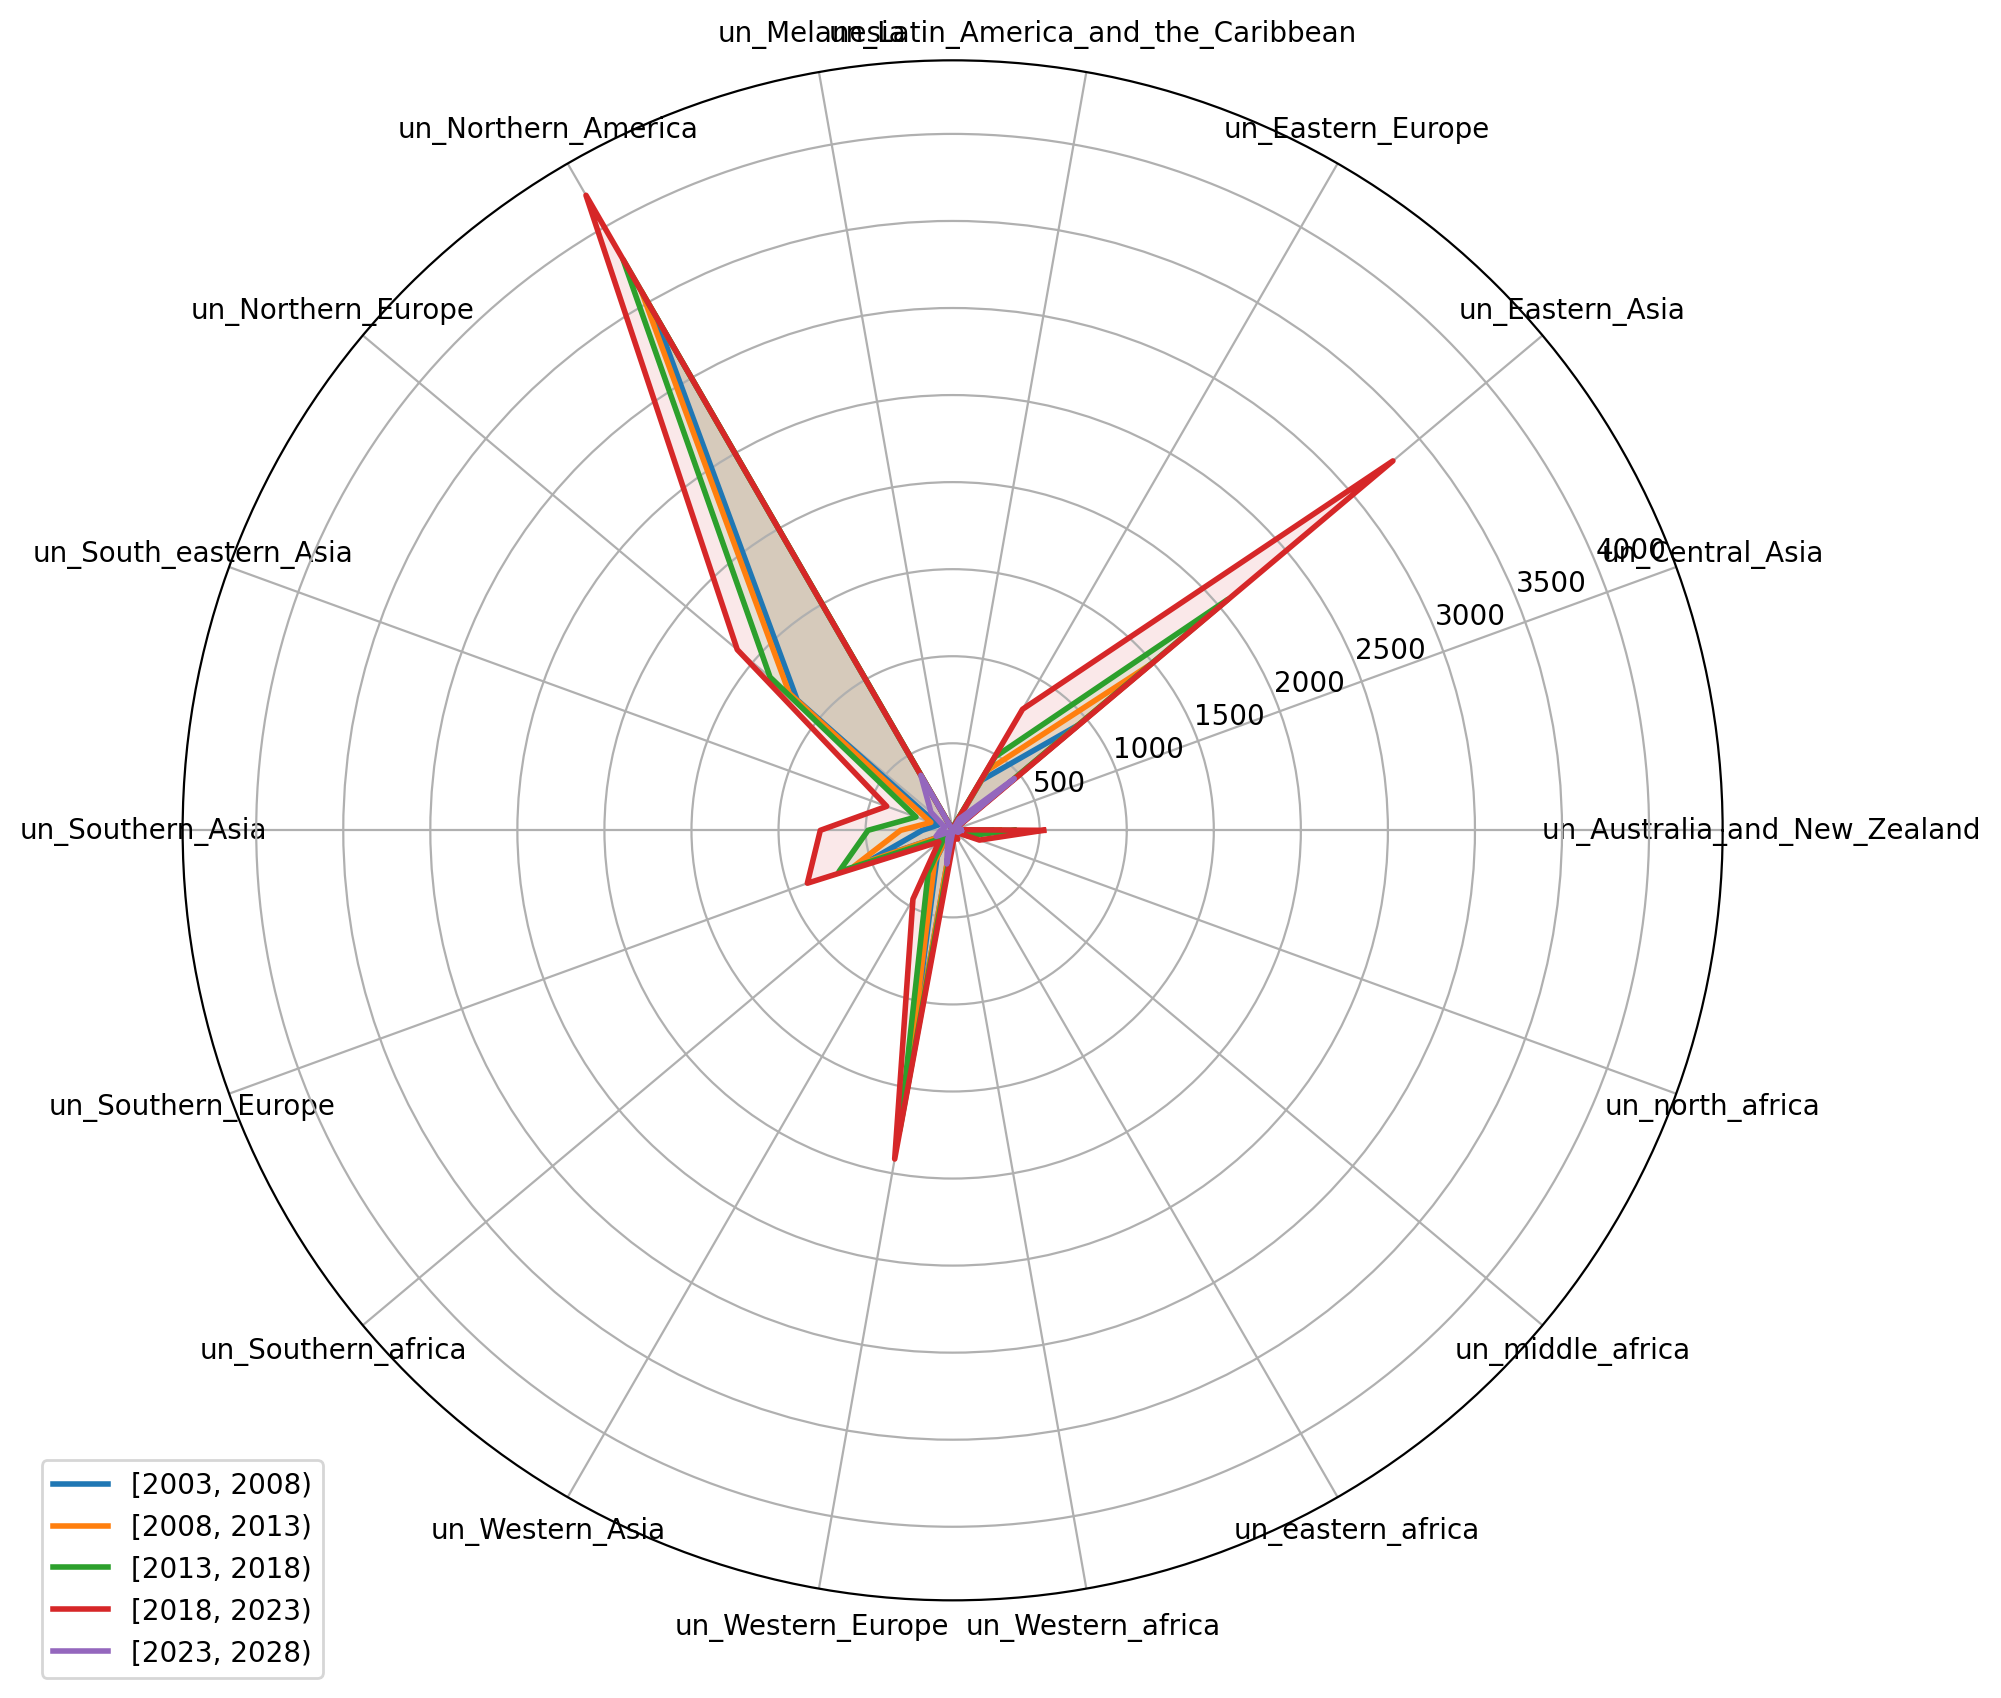

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = pivot_df.drop('index').reset_index()

# Convert all levels of multi-index columns to strings
df.columns = df.columns.map(lambda x: tuple(map(str, x)))

# Flatten the multi-level index if you have one
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# Let's take Publication Count for this example
time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)', '[2023, 2028)']

# Create a figure and a set of subplots (axes)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Loop through each time period to plot data on the radar chart
for period in time_periods:
    values = df['Publication Count_' + period].tolist()
    values += values[:1]  # Repeat the first value to close the circle

    angles = [n / float(len(df)) * 2 * np.pi for n in range(len(df))]
    angles += angles[:1]

    ax.fill(angles, values, alpha=0.1)
    ax.plot(angles, values, linewidth=2, label=period)

# Add axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df['un_region_'].tolist())

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


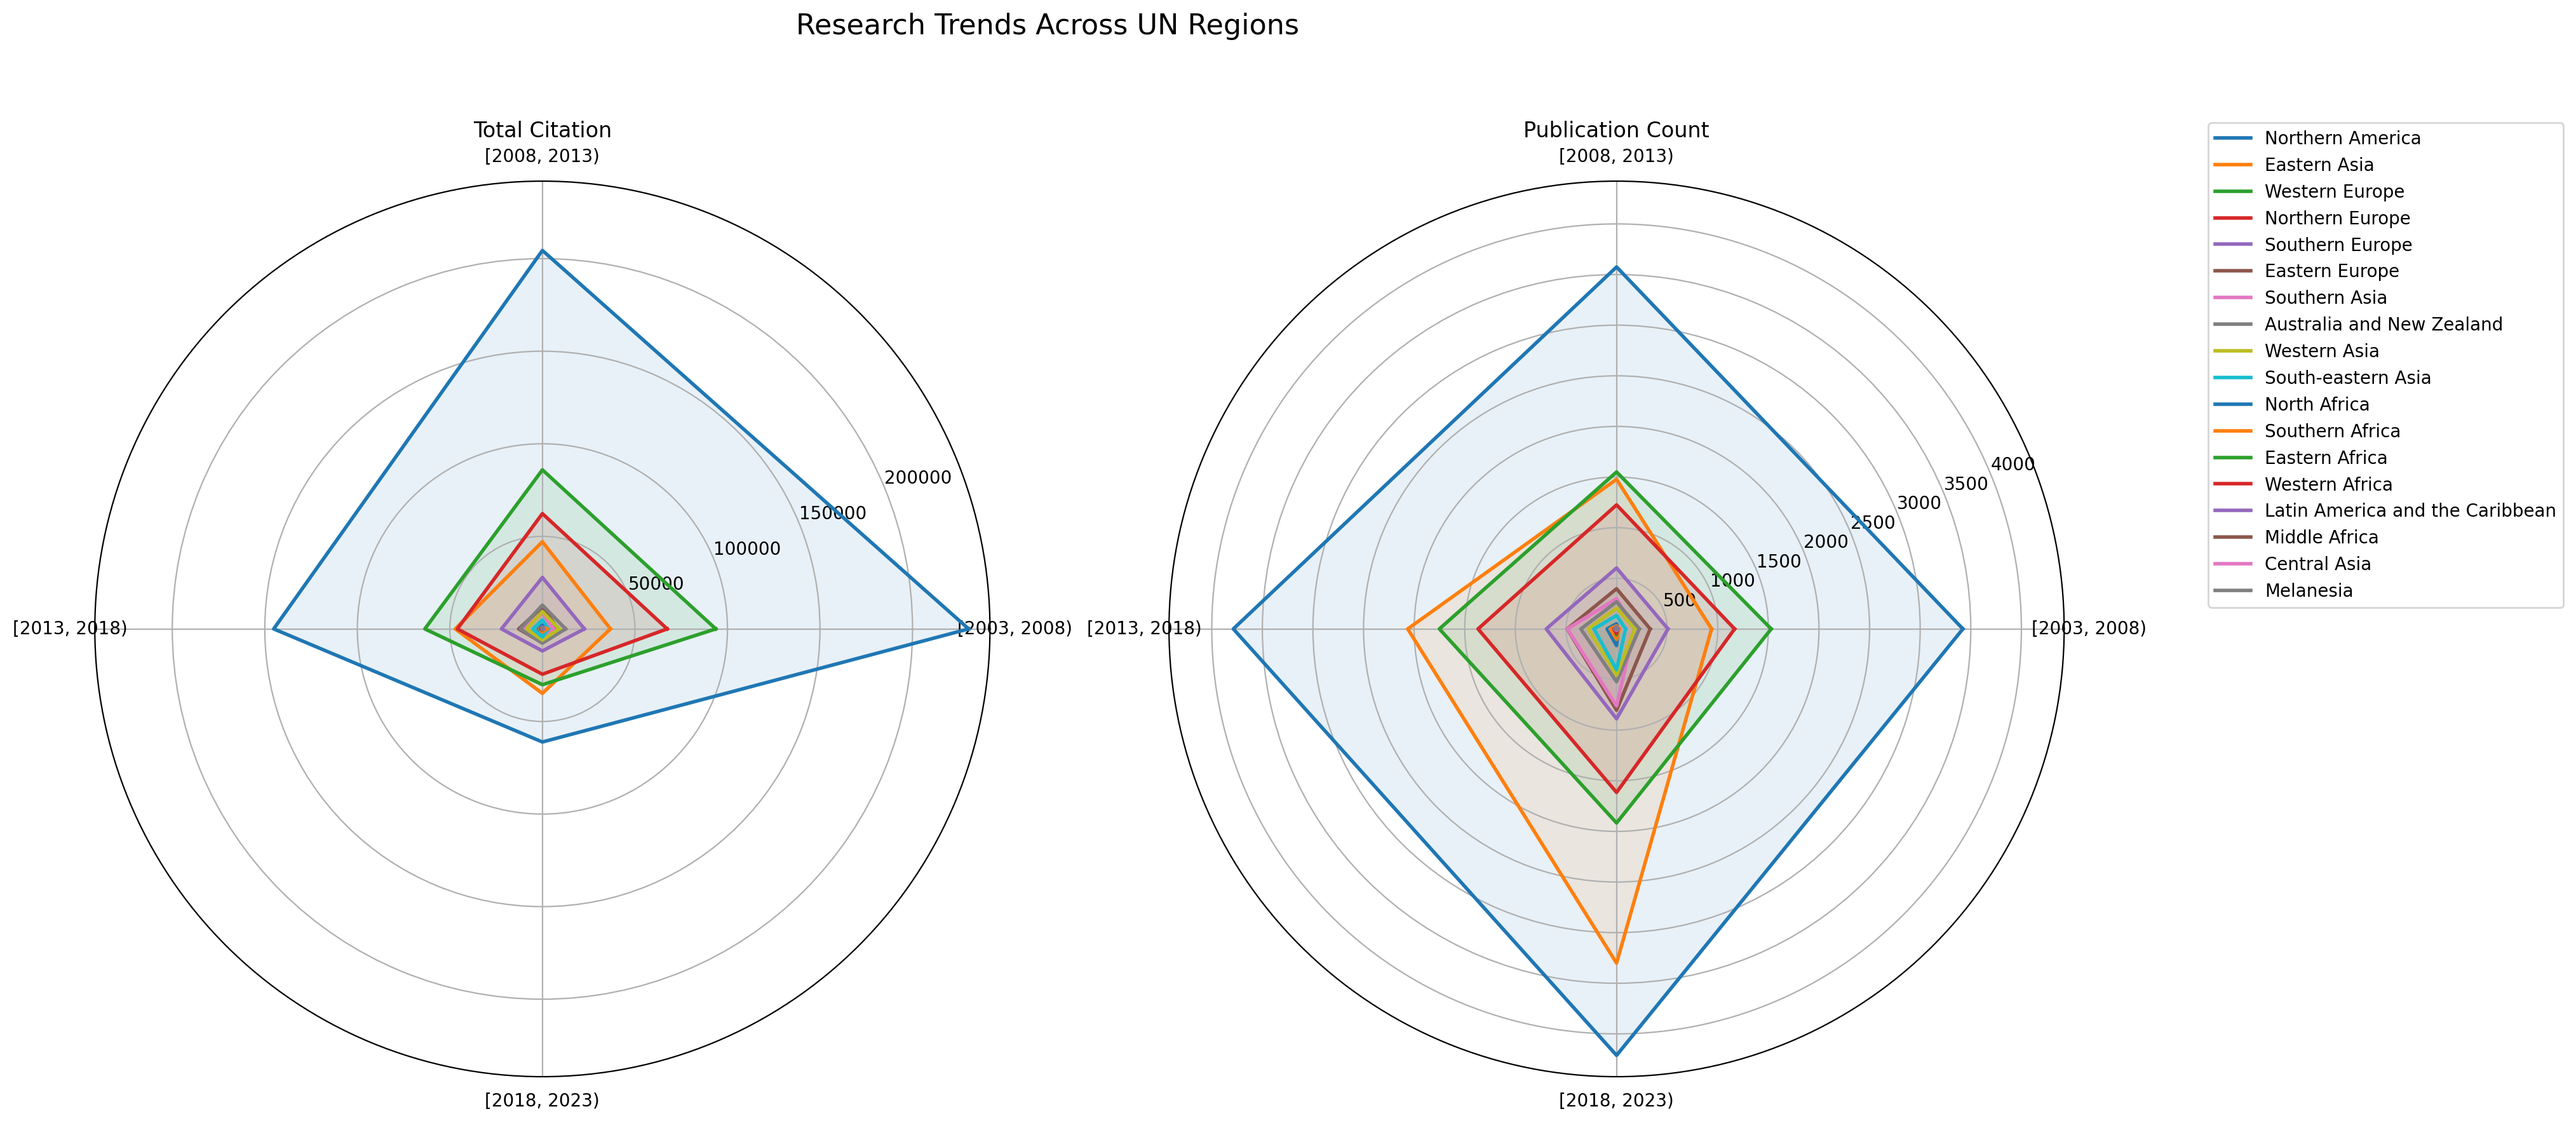

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = pivot_df.drop('index').reset_index()

# Convert all levels of multi-index columns to strings
df.columns = df.columns.map(lambda x: tuple(map(str, x)))

# Sum the publication counts for each UN region
df['Total_Publication_Count'] = df['Publication Count'].apply(lambda x: x.sum(), axis=1)

# Sort the DataFrame by the total publication count
df = df.sort_values('Total_Publication_Count', ascending=False)

# Let's take Publication Count for this example
time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)']

# Mapping of abbreviated UN region names to full names
region_mapping = {
    'un_Australia_and_New_Zealand': 'Australia and New Zealand',
    'un_Central_Asia': 'Central Asia',
    'un_Eastern_Asia': 'Eastern Asia',
    'un_Eastern_Europe': 'Eastern Europe',
    'un_Latin_America_and_the_Caribbean': 'Latin America and the Caribbean',
    'un_Melanesia': 'Melanesia',
    'un_Northern_America': 'Northern America',
    'un_Northern_Europe': 'Northern Europe',
    'un_South_eastern_Asia': 'South-eastern Asia',
    'un_Southern_Asia': 'Southern Asia',
    'un_Southern_Europe': 'Southern Europe',
    'un_Southern_africa': 'Southern Africa',
    'un_Western_Asia': 'Western Asia',
    'un_Western_Europe': 'Western Europe',
    'un_Western_africa': 'Western Africa',
    'un_eastern_africa': 'Eastern Africa',
    'un_middle_africa': 'Middle Africa',
    'un_north_africa': 'North Africa'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

# Set a global title
fig.suptitle('Research Trends Across UN Regions', fontsize=16)

# Loop through each region to plot data on the radar chart
for index, row in df.iterrows():
    region_name = region_mapping.get(row[(        'un_region',           '')], row[(        'un_region',           '')])
    values1 = row['Total Citation'][time_periods].values.flatten().tolist()
    values1 += values1[:1]
    values2 = row['Publication Count'][time_periods].values.flatten().tolist()
    values2 += values2[:1]

    angles = [n / float(len(time_periods)) * 2 * np.pi for n in range(len(time_periods))]
    angles += angles[:1]

    ax1.plot(angles, values1, linewidth=2) #, label=region_name
    ax1.fill(angles, values1, alpha=0.1)

    ax2.plot(angles, values2, linewidth=2, label=region_name)
    ax2.fill(angles, values2, alpha=0.1)

# Add axis labels
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(time_periods)
ax1.set_title('Total Citation')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(time_periods)
ax2.set_title('Publication Count')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))

plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Radar_charts_UN Regions_across_periods.png", dpi=600)
plt.show()


## WB REGION GROUP

In [36]:
wb_region_group = ['Addresses','wb_east_asia_and_pacific', 'wb_europe_and_central_asia', 'wb_latin_america_and_the_caribbean', 'wb_middle_east_and_north_africa', 'wb_north_america', 'wb_south_asia', 'wb_sub_saharan_africa',
]

In [37]:
#Import data
wb_region_group_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
wb_region_group = [region for region in wb_region_group if region in wb_region_group_data.columns]#

# Select columns and reset index
wb_region_group_data = wb_region_group_data[wb_region_group].reset_index()

# Rename columns and set index
wb_region_group_data = wb_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
#wb_region_group_data#.head()

In [38]:
wb_region_group_data_citation = pd.concat([wb_region_group_data, citation_data], axis=1).reset_index()
wb_region_group_data_citation = wb_region_group_data_citation[wb_region_group_data_citation['Publication Year'] >= 2003]

#wb_region_group_data_citation#.head(2)

In [39]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in wb_region_group_data_citation.columns[:-1]:
    publication_counts[column] = wb_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['wb_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['wb_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['wb_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='wb_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='wb_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('wb_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wb_region_count_citation_list.csv')

final_merged_df#.head(60)

wb_region  Publication Count  Total Citation  \
0                              wos_ID              37720       1172562.0   
1                    Publication Year              37720       1172562.0   
2                           Addresses              37645       1170299.0   
3            wb_east_asia_and_pacific              10154        218539.0   
4          wb_europe_and_central_asia              14811        496730.0   
5  wb_latin_america_and_the_caribbean               1491         34677.0   
6     wb_middle_east_and_north_africa               1600         37128.0   
7                    wb_north_america              15361        641212.0   
8                       wb_south_asia               1374         25844.0   
9               wb_sub_saharan_africa                426         10323.0   

   Average Citation Count           %  
0               32.389426  100.199230  
1               32.389426  100.199230  
2               32.371625  100.000000  
3               22.423456   26.973038  
4               34.707239   39.343870  
5               24.081250    3.960685  
6               24.250816    4.250232  
7               43.445491   40.804888  
8               19.972179    3.649887  
9               25.363636    1.131624

In [40]:
# Reset the index to make 'Publication Year' a regular column
wb_region_group_data2 = wb_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
wb_region_group_data2['Year Group'] = pd.cut(wb_region_group_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
wb_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(wb_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='wb_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'wb_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['Publication']
# Rename columns
grouped.columns = ['Year Group', 'wb_region', 'Publication Count',	'Total Citation', 'Average Citation Count']

#grouped

In [41]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='wb_region', columns='Year Group', values=['Publication Count',	'Total Citation', 'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wb_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/wb_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count               \
Year Group                              [2003, 2008) [2008, 2013)   
wb_region                                                           
index                                         7332.0       8137.0   
wb_east_asia_and_pacific                      1225.0       1822.0   
wb_europe_and_central_asia                    3156.0       3251.0   
wb_latin_america_and_the_caribbean             190.0        257.0   
wb_middle_east_and_north_africa                157.0        244.0   
wb_north_america                              3422.0       3575.0   
wb_south_asia                                  164.0        256.0   
wb_sub_saharan_africa                           43.0         54.0   

                                                                           \
Year Group                         [2013, 2018) [2018, 2023) [2023, 2028)   
wb_region                                                                   
index                                    9208.0      11729.0       1314.0   
wb_east_asia_and_pacific                 2556.0       4027.0        524.0   
wb_europe_and_central_asia               3621.0       4340.0        443.0   
wb_latin_america_and_the_caribbean        385.0        596.0         63.0   
wb_middle_east_and_north_africa           433.0        676.0         90.0   
wb_north_america                         3787.0       4212.0        365.0   
wb_south_asia                             347.0        551.0         56.0   
wb_sub_saharan_africa                     117.0        197.0         15.0   

                                   Total Citation                            \
Year Group                           [2003, 2008) [2008, 2013) [2013, 2018)   
wb_region                                                                     
index                                    401050.0     358641.0     276055.0   
wb_east_asia_and_pacific                  50692.0      61234.0      62329.0   
wb_europe_and_central_asia               171979.0     150796.0     116816.0   
wb_latin_america_and_the_caribbean         9252.0       8995.0       9949.0   
wb_middle_east_and_north_africa            8101.0      10312.0      11056.0   
wb_north_america                         230340.0     204429.0     145203.0   
wb_south_asia                              5750.0       7619.0       8169.0   
wb_sub_saharan_africa                      2930.0       1356.0       3487.0   

                                                              \
Year Group                         [2018, 2023) [2023, 2028)   
wb_region                                                      
index                                  136383.0        433.0   
wb_east_asia_and_pacific                44084.0        200.0   
wb_europe_and_central_asia              56946.0        193.0   
wb_latin_america_and_the_caribbean       6466.0         15.0   
wb_middle_east_and_north_africa          7634.0         25.0   
wb_north_america                        61079.0        161.0   
wb_south_asia                            4293.0         13.0   
wb_sub_saharan_africa                    2548.0          2.0   

                                   Average Citation Count               \
Year Group                                   [2003, 2008) [2008, 2013)   
wb_region                                                                
index                                           54.698582    44.075335   
wb_east_asia_and_pacific                        41.381224    33.608123   
wb_europe_and_central_asia                      54.492712    46.384497   
wb_latin_america_and_the_caribbean              48.694737    35.000000   
wb_middle_east_and_north_africa                 51.598726    42.262295   
wb_north_america                                67.311514    57.182937   
wb_south_asia                                   35.060976    29.761719   
wb_sub_saharan_africa                           68.139535    25.111111   

                                     

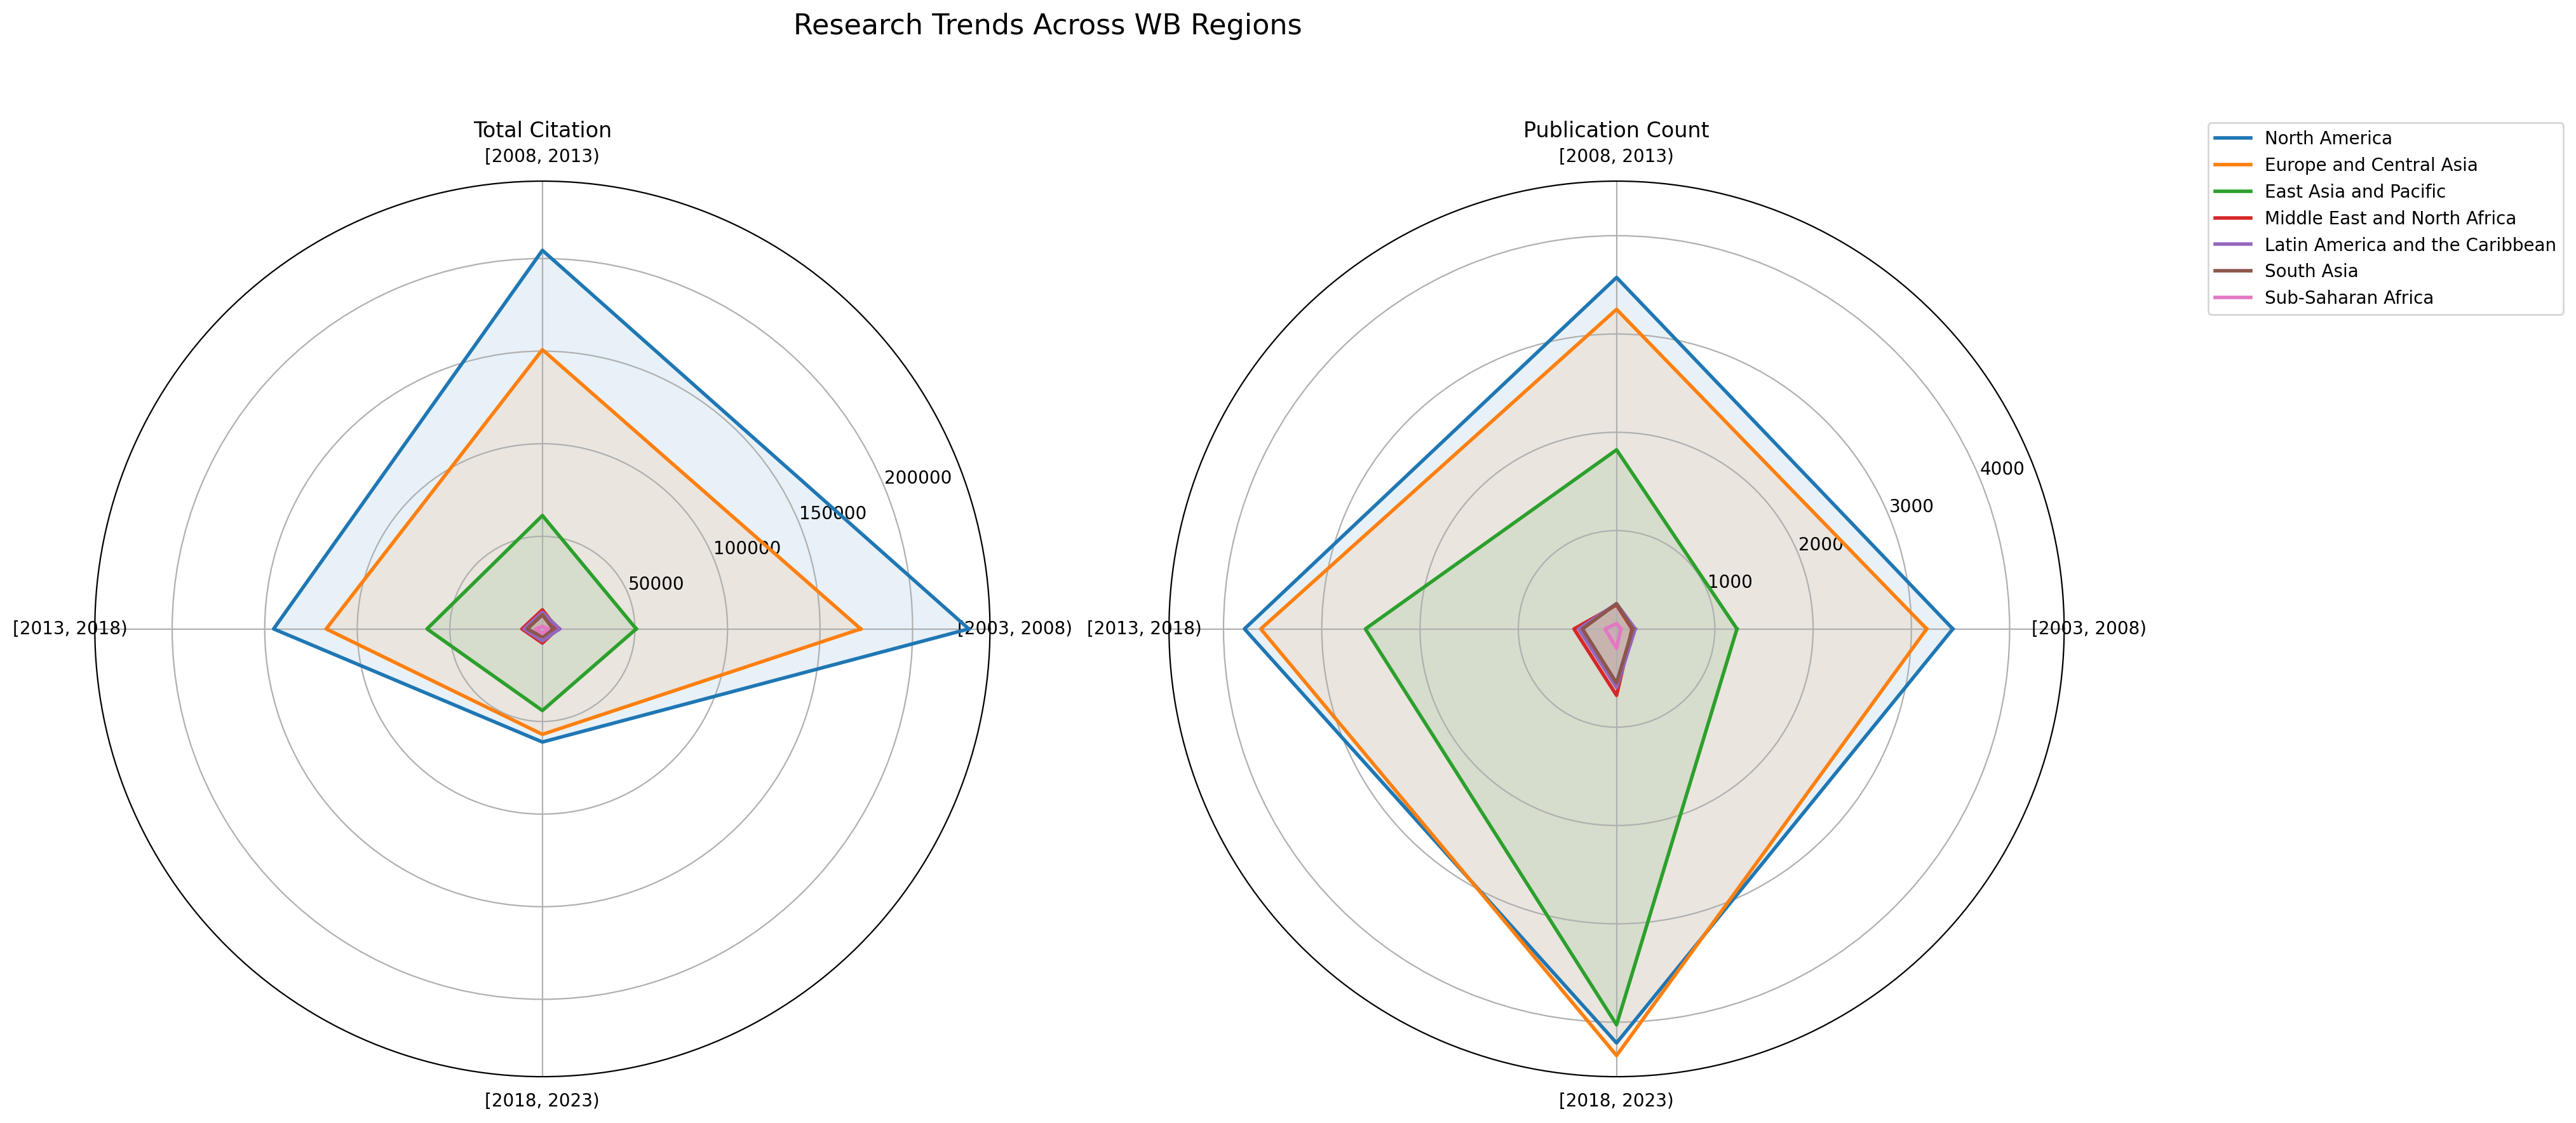

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = pivot_df.drop('index').reset_index()

# Convert all levels of multi-index columns to strings
df.columns = df.columns.map(lambda x: tuple(map(str, x)))

# Sum the publication counts for each UN region
df['Total_Publication_Count'] = df['Publication Count'].apply(lambda x: x.sum(), axis=1)

# Sort the DataFrame by the total publication count
df = df.sort_values('Total_Publication_Count', ascending=False)

# Let's take Publication Count for this example
time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)']

# Mapping of World Bank region codes to full names
region_mapping = {
    'index': 'Global',
    'wb_east_asia_and_pacific': 'East Asia and Pacific',
    'wb_europe_and_central_asia': 'Europe and Central Asia',
    'wb_latin_america_and_the_caribbean': 'Latin America and the Caribbean',
    'wb_middle_east_and_north_africa': 'Middle East and North Africa',
    'wb_north_america': 'North America',
    'wb_south_asia': 'South Asia',
    'wb_sub_saharan_africa': 'Sub-Saharan Africa'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

# Set a global title
fig.suptitle('Research Trends Across WB Regions', fontsize=16)

# Loop through each region to plot data on the radar chart
for index, row in df.iterrows():
    region_name = region_mapping.get(row[(        'wb_region',           '')], row[(        'wb_region',           '')])
    values1 = row['Total Citation'][time_periods].values.flatten().tolist()
    values1 += values1[:1]
    values2 = row['Publication Count'][time_periods].values.flatten().tolist()
    values2 += values2[:1]

    angles = [n / float(len(time_periods)) * 2 * np.pi for n in range(len(time_periods))]
    angles += angles[:1]

    ax1.plot(angles, values1, linewidth=2) #, label=region_name
    ax1.fill(angles, values1, alpha=0.1)

    ax2.plot(angles, values2, linewidth=2, label=region_name)
    ax2.fill(angles, values2, alpha=0.1)

# Add axis labels
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(time_periods)
ax1.set_title('Total Citation')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(time_periods)
ax2.set_title('Publication Count')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))

plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Radar_charts_WB_Regions_across_periods.png", dpi=600)
plt.show()


# income

In [43]:
income = ['Addresses','wb_low_income_economies', 'wb_lower_middle_income_economies', 'wb_upper_middle_income_economies', 'wb_high_income_economies',
              # GLOBAL SOUTH
        'global_south', 'global_south_not_china',
              # MAIN CONTRIBUTORS COUNTRIES
          'United States','China'
                  ]

In [44]:
#Import data
income_data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/countries_and_un_wb_region_income_all.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
income = [elt for elt in income if elt in income_data.columns]#

# Select columns and reset index
income_data = income_data[income].reset_index()

# Rename columns and set index
income_group_data = income_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
#income_group_data#.head()

In [45]:
#country_data_with_Global_North[['Addresses','Global North','Global North Without US']]

In [46]:
income_group_data_citation = pd.concat([income_group_data,
                                        country_data_with_Global_North[['Global North','Global North Without US']],
                                        citation_data], axis=1).reset_index()
income_group_data_citation = income_group_data_citation[income_group_data_citation['Publication Year'] >= 2003]
#income_group_data_citation#.head(2)

In [47]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in income_group_data_citation.columns[:-1]:
    publication_counts[column] = income_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['income', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['income', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['income', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='income', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='income', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('income')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/income_count_citation_list.csv')

final_merged_df#.head(60)

income  Publication Count  Total Citation  \
0                             wos_ID              37720       1172562.0   
1                   Publication Year              37720       1172562.0   
2                          Addresses              37645       1170299.0   
3            wb_low_income_economies                 87          1713.0   
4   wb_lower_middle_income_economies               2448         41501.0   
5   wb_upper_middle_income_economies               8245        155737.0   
6           wb_high_income_economies              34210       1127331.0   
7                       global_south               9527        178523.0   
8             global_south_not_china               4748         91959.0   
9                      United States              13984        588538.0   
10                             China               4968         90958.0   
11                      Global North              31535       1084728.0   
12           Global North Without US              21274        672674.0   

    Average Citation Count           %  
0                32.389426  100.199230  
1                32.389426  100.199230  
2                32.371625  100.000000  
3                20.392857    0.231106  
4                17.849892    6.502856  
5                19.826480   21.901979  
6                34.240402   90.875282  
7                19.587777   25.307478  
8                20.273148   12.612565  
9                43.832427   37.147031  
10               19.120875   13.196972  
11               35.757120   83.769425  
12               32.752654   56.512153

In [48]:
# Reset the index to make 'Publication Year' a regular column
income_group_data2 = income_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
income_group_data2['Year Group'] = pd.cut(income_group_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Drop unnecessary columns
income_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(income_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='income', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'income']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['Publication']

# Rename columns
grouped.columns = ['Year Group', 'income', 'Publication Count',	'Total Citation','Average Citation Count']


#grouped

In [49]:

# Pivot the DataFrame
pivot_df = grouped.pivot(index='income', columns='Year Group', values=['Publication Count',	'Total Citation','Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/income_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/income_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count                            \
Year Group                            [2003, 2008) [2008, 2013) [2013, 2018)   
income                                                                         
China                                        337.0        691.0       1226.0   
Global North                                6822.0       7184.0       7674.0   
Global North Without US                     4349.0       4743.0       5257.0   
United States                               3179.0       3235.0       3397.0   
global_south                                 809.0       1438.0       2452.0   
global_south_not_china                       478.0        755.0       1249.0   
index                                       7332.0       8137.0       9208.0   
wb_high_income_economies                    6918.0       7506.0       8361.0   
wb_low_income_economies                        8.0         13.0         29.0   
wb_lower_middle_income_economies             215.0        382.0        652.0   
wb_upper_middle_income_economies             768.0       1266.0       2032.0   

                                                           Total Citation  \
Year Group                       [2018, 2023) [2023, 2028)   [2003, 2008)   
income                                                                      
China                                  2346.0        368.0        14837.0   
Global North                           8976.0        879.0       387169.0   
Global North Without US                6282.0        643.0       227671.0   
United States                          3842.0        331.0       212200.0   
global_south                           4256.0        572.0        34253.0   
global_south_not_china                 2039.0        227.0        20088.0   
index                                 11729.0       1314.0       401050.0   
wb_high_income_economies              10281.0       1144.0       391011.0   
wb_low_income_economies                  35.0          2.0          314.0   
wb_lower_middle_income_economies       1085.0        114.0         7195.0   
wb_upper_middle_income_economies       3680.0        499.0        31537.0   

                                                                         \
Year Group                       [2008, 2013) [2013, 2018) [2018, 2023)   
income                                                                    
China                                 21965.0      28178.0      25861.0   
Global North                         337118.0     246991.0     113147.0   
Global North Without US              204303.0     163024.0      77440.0   
United States                        188945.0     130653.0      56587.0   
global_south                          44652.0      56458.0      42994.0   
global_south_not_china                24158.0      28754.0      18905.0   
index                                358641.0     276055.0     136383.0   
wb_high_income_economies             345927.0     263129.0     126876.0   
wb_low_income_economies                 313.0        825.0        260.0   
wb_lower_middle_income_economies      11273.0      14338.0       8669.0   
wb_upper_middle_income_economies      38007.0      47588.0      38452.0   

                                              Average Citation Count  \
Year Group                       [2023, 2028)           [2003, 2008)   
income                                                                 
China                                   117.0              44.026706   
Global North                            303.0              56.753005   
Global North Without US                 236.0              52.350195   
United States                           153.0              66.750550   
global_south                            166.0              42.339926   
global_south_not_china                   54.0              42.025105   
index                                   433.0              54.698582   
wb_high_income_economies                388.0              56.

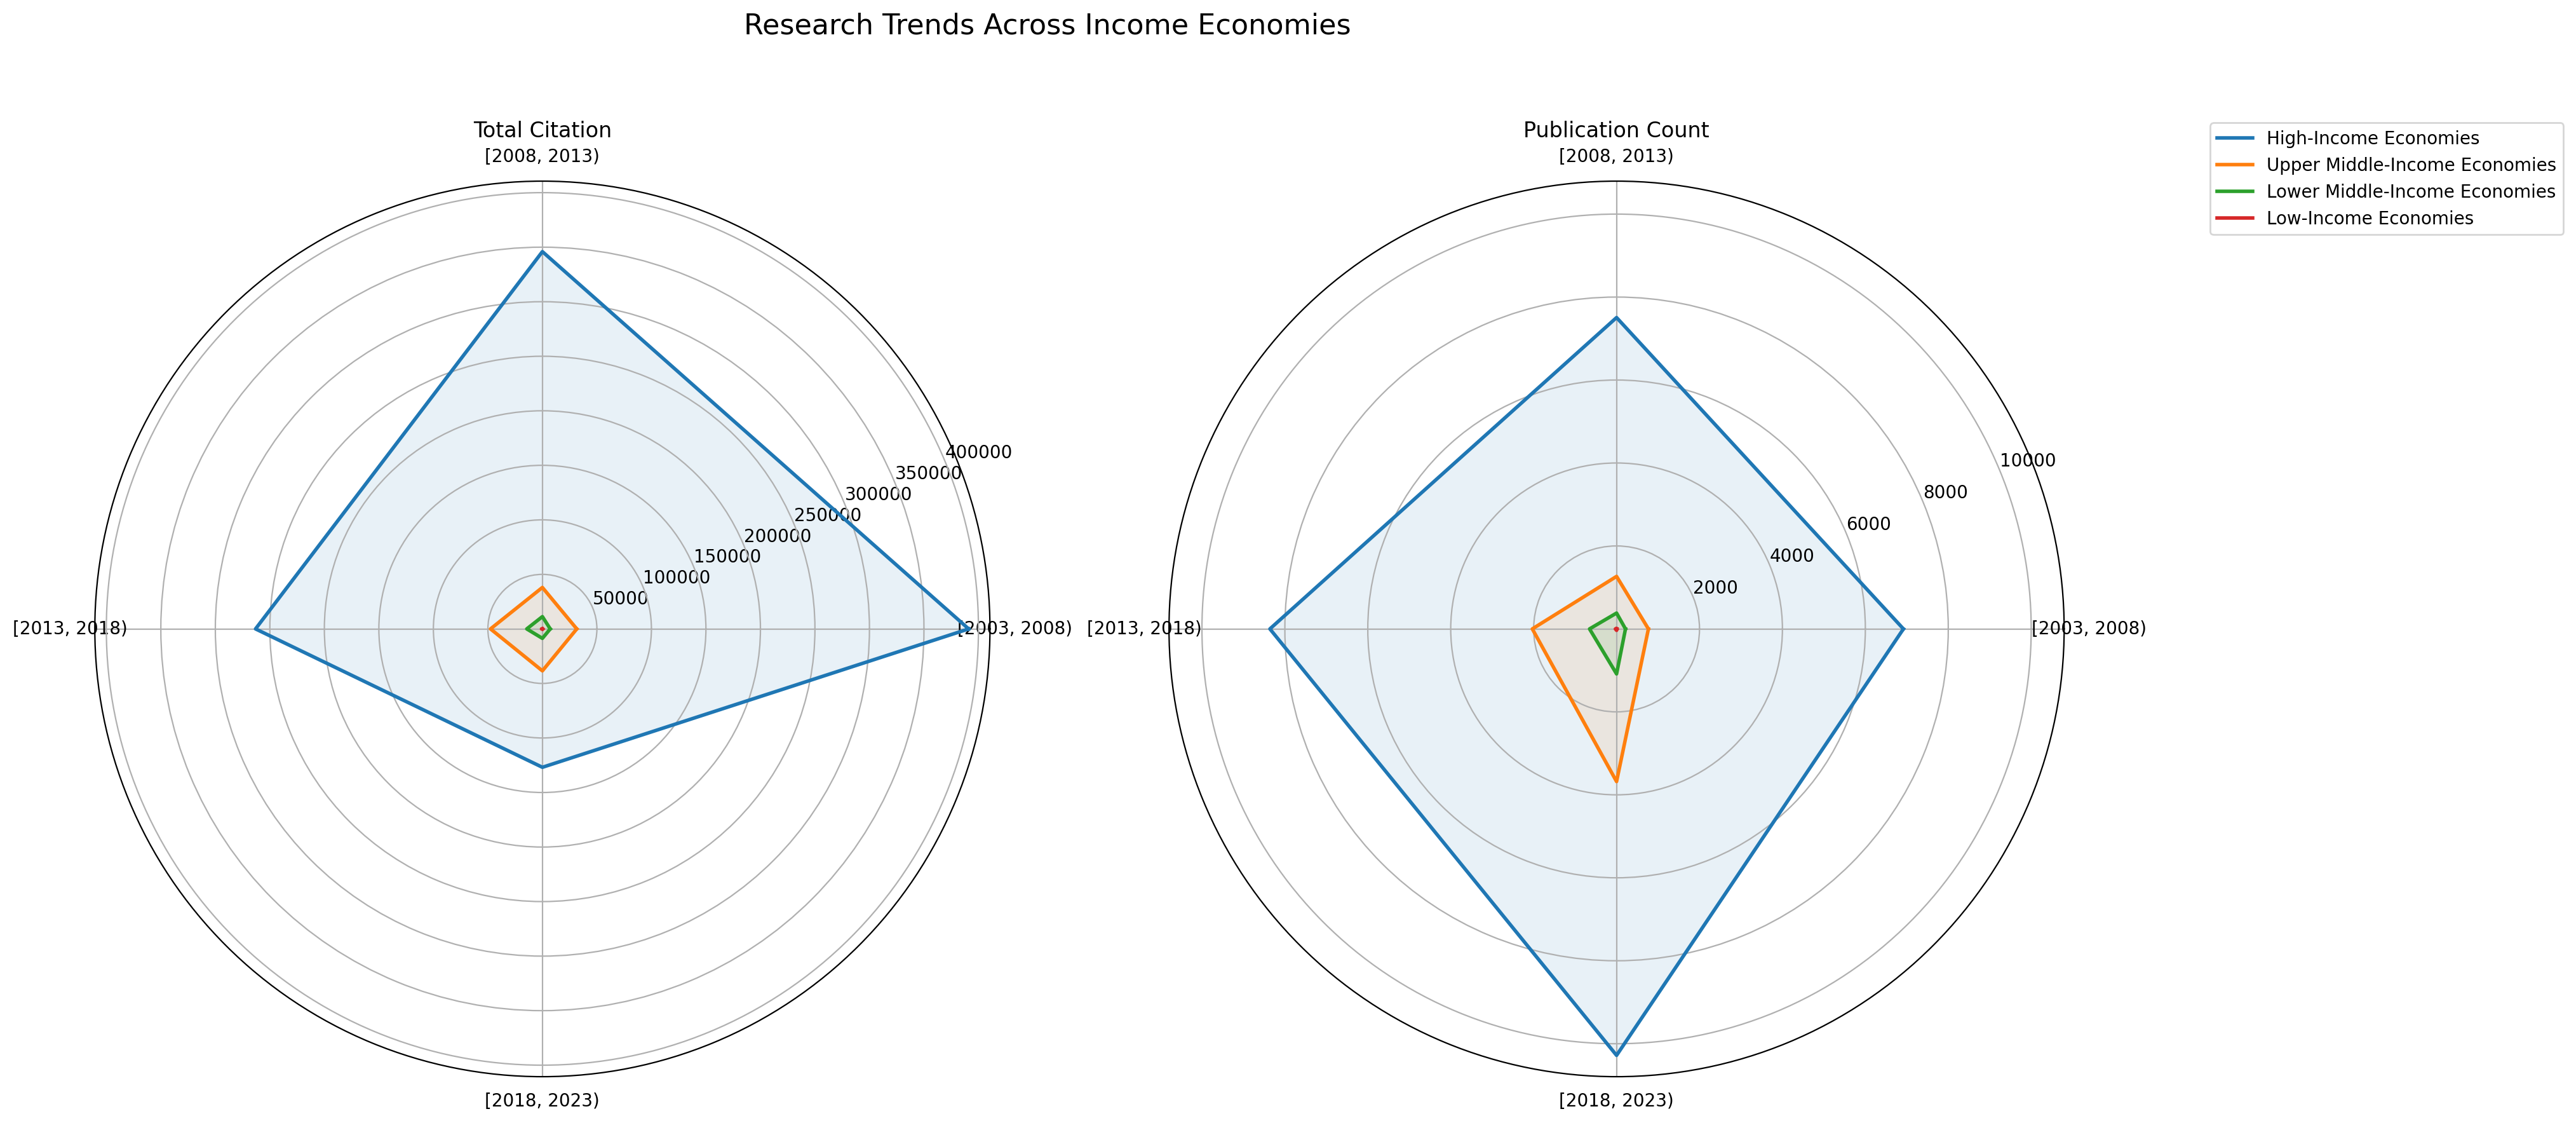

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = pivot_df.drop(['index','global_south','global_south_not_china','China','United States',
                    'Global North','Global North Without US']).reset_index()

# Convert all levels of multi-index columns to strings
df.columns = df.columns.map(lambda x: tuple(map(str, x)))

# Sum the publication counts for each UN region
df['Total_Publication_Count'] = df['Publication Count'].apply(lambda x: x.sum(), axis=1)

# Sort the DataFrame by the total publication count
df = df.sort_values('Total_Publication_Count', ascending=False)

# Let's take Publication Count for this example
time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)']

# Mapping of income levels to full, readable names
region_mapping = {
    'global_south': 'Global South',
    'global_south_not_china': 'Global South (Excluding China)',
    'index': 'Global',
    'wb_high_income_economies': 'High-Income Economies',
    'wb_low_income_economies': 'Low-Income Economies',
    'wb_lower_middle_income_economies': 'Lower Middle-Income Economies',
    'wb_upper_middle_income_economies': 'Upper Middle-Income Economies'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

# Set a global title
fig.suptitle('Research Trends Across Income Economies', fontsize=16)

# Loop through each region to plot data on the radar chart
for index, row in df.iterrows():
    region_name = region_mapping.get(row[(        'income',           '')], row[(        'income',           '')])
    values1 = row['Total Citation'][time_periods].values.flatten().tolist()
    values1 += values1[:1]
    values2 = row['Publication Count'][time_periods].values.flatten().tolist()
    values2 += values2[:1]

    angles = [n / float(len(time_periods)) * 2 * np.pi for n in range(len(time_periods))]
    angles += angles[:1]

    ax1.plot(angles, values1, linewidth=2) #, label=region_name
    ax1.fill(angles, values1, alpha=0.1)

    ax2.plot(angles, values2, linewidth=2, label=region_name)
    ax2.fill(angles, values2, alpha=0.1)

# Add axis labels
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(time_periods)
ax1.set_title('Total Citation')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(time_periods)
ax2.set_title('Publication Count')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))

plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Radar_charts_income_across_periods.png", dpi=600)
plt.show()


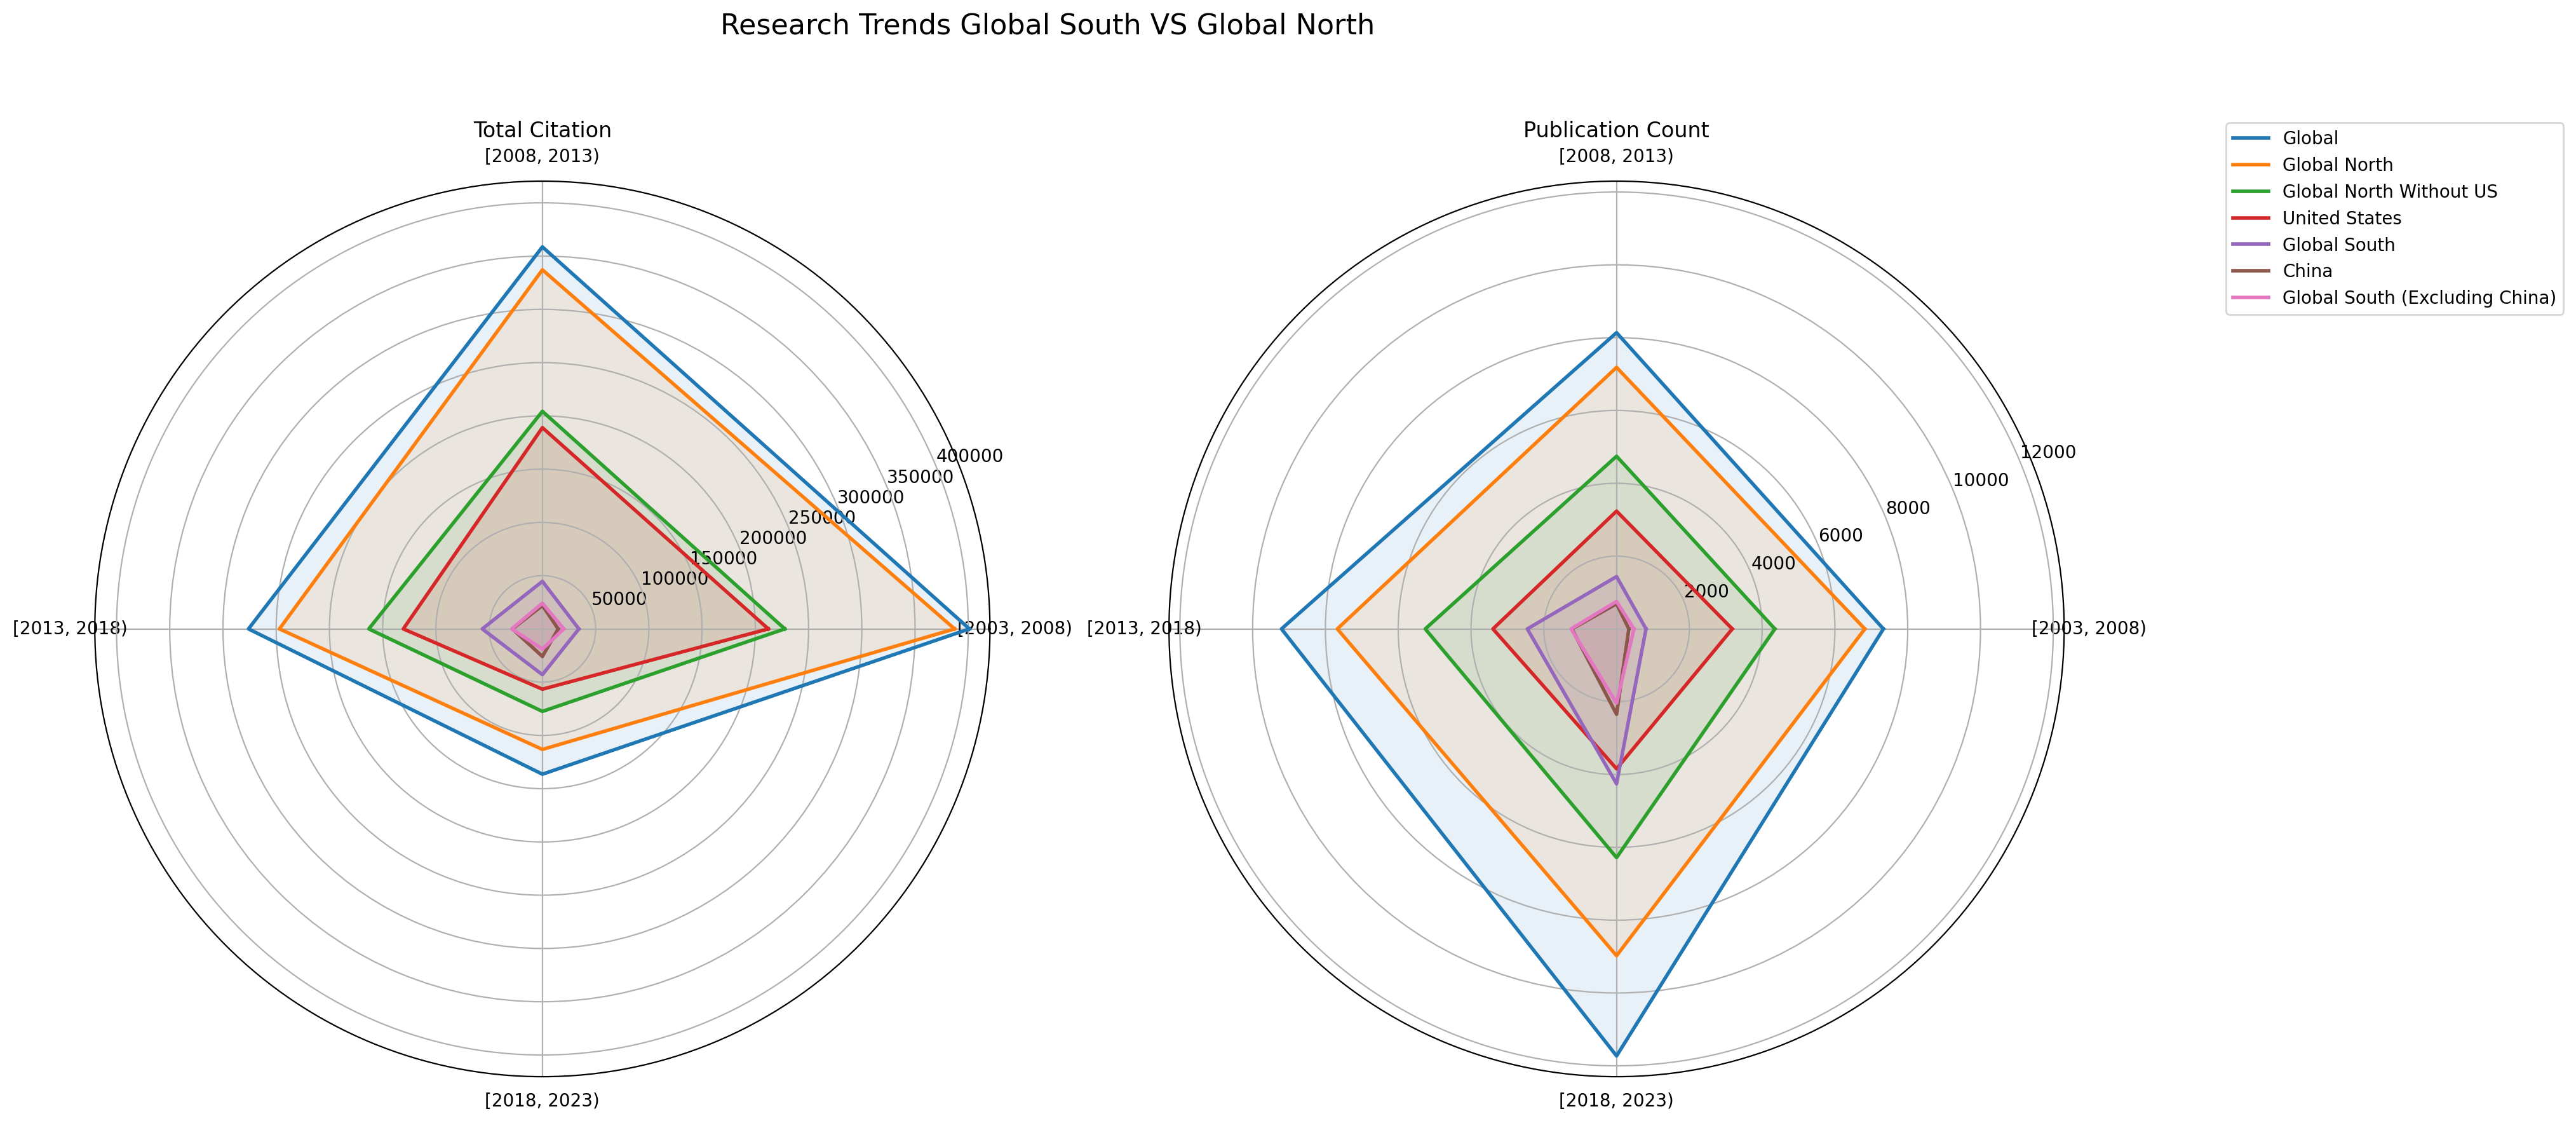

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = pivot_df.drop(['wb_high_income_economies','wb_low_income_economies',
                    'wb_lower_middle_income_economies','wb_upper_middle_income_economies']).reset_index()

# Convert all levels of multi-index columns to strings
df.columns = df.columns.map(lambda x: tuple(map(str, x)))

# Sum the publication counts for each UN region
df['Total_Publication_Count'] = df['Publication Count'].apply(lambda x: x.sum(), axis=1)

# Sort the DataFrame by the total publication count
df = df.sort_values('Total_Publication_Count', ascending=False)

# Let's take Publication Count for this example
time_periods = ['[2003, 2008)', '[2008, 2013)', '[2013, 2018)', '[2018, 2023)']

# Mapping of income levels to full, readable names
region_mapping = {
    'global_south': 'Global South',
    'global_south_not_china': 'Global South (Excluding China)',
    'index': 'Global',
    'wb_high_income_economies': 'High-Income Economies',
    'wb_low_income_economies': 'Low-Income Economies',
    'wb_lower_middle_income_economies': 'Lower Middle-Income Economies',
    'wb_upper_middle_income_economies': 'Upper Middle-Income Economies'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

# Set a global title
fig.suptitle('Research Trends Global South VS Global North', fontsize=16)

# Loop through each region to plot data on the radar chart
for index, row in df.iterrows():
    region_name = region_mapping.get(row[(        'income',           '')], row[(        'income',           '')])
    values1 = row['Total Citation'][time_periods].values.flatten().tolist()
    values1 += values1[:1]
    values2 = row['Publication Count'][time_periods].values.flatten().tolist()
    values2 += values2[:1]

    angles = [n / float(len(time_periods)) * 2 * np.pi for n in range(len(time_periods))]
    angles += angles[:1]

    ax1.plot(angles, values1, linewidth=2) #, label=region_name
    ax1.fill(angles, values1, alpha=0.1)

    ax2.plot(angles, values2, linewidth=2, label=region_name)
    ax2.fill(angles, values2, alpha=0.1)

# Add axis labels
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(time_periods)
ax1.set_title('Total Citation')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(time_periods)
ax2.set_title('Publication Count')

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9))

plt.savefig("/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Radar_charts_Global_South_across_periods.png", dpi=600)
plt.show()


# institutions

In [52]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm

In [53]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

institution_data  = data.copy().reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])[['Affiliations']]
#institution_data #.head()

In [54]:
institution_data['Affiliations'].count()

35498

In [55]:
import pandas as pd

# Your DataFrame is named institution_data
institution_list = institution_data['Affiliations'].str.split(';').explode().str.strip()

# Count the unique institution names
unique_institution_count = institution_list.nunique()

print('The number of unique institution is:', unique_institution_count)

#
institution_list2 = institution_list.to_frame().reset_index()

# and sum citations within each group
grouped = institution_list2.groupby(['Affiliations']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/institution_data['Affiliations'].count()*100

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Rename columns
grouped.columns = ['institution', 'count','citation', '%','Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_count_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_count_citation.csv')

grouped##.head(50)

The number of unique institution is: 5513


institution  count  citation  \
0               (adventhealth) central florida division      1         1   
1                                                    3m      4       124   
2               a*star - bioinformatics institute (bii)     11       294   
3     a*star - bioprocessing technology institute (bti)      6        82   
4     a*star - experimental drug development centre ...      6       273   
...                                                 ...    ...       ...   
5508                           zunyi medical university     13       124   
5509  zurich center integrative human physiology (zihp)      3        80   
5510              zurich university of applied sciences     19       240   
5511                              zuse institute berlin      1        14   
5512                                     zymogenet inc.      5       530   

             %  Average Citation Count  
0     0.002817                1.000000  
1     0.011268               31.000000  
2     0.030988               26.727273  
3     0.016902               13.666667  
4     0.016902               45.500000  
...        ...                     ...  
5508  0.036622                9.538462  
5509  0.008451               26.666667  
5510  0.053524               12.631579  
5511  0.002817               14.000000  
5512  0.014085              106.000000  

[5513 rows x 5 columns]

In [56]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
institutions_list2 = institution_list.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
institutions_list2['Year Group'] = pd.cut(institutions_list2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and count institution appearances in each group
grouped = institutions_list2.groupby(['Year Group','Affiliations']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Convert the Series to a DataFrame and rename the column
grouped = grouped.rename(columns={'wos_ID': 'counts'}).reset_index().drop(columns='index')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (grouped['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
institution_counts_group_filtered = grouped[~mask]

# Rename columns
institution_counts_group_filtered.columns = ['Year Group','Affiliations', 'Publication Count', 'Total Citations', 'Average Citation Count']

# Save data
#institution_counts_group_filtered.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_counts_group_year.pkl')
#institution_counts_group_filtered.to_excel(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_counts_group_year.xls')

# Print the result
#institution_counts_group_filtered#.tail(60)

In [132]:
# Pivot the DataFrame
pivot_df = institution_counts_group_filtered.pivot(index='Affiliations', columns='Year Group', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_list_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/institution_list_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count  \
Year Group                                              [2003, 2008)   
Affiliations                                                           
(adventhealth) central florida division                          0.0   
3m                                                               0.0   
a*star - bioinformatics institute (bii)                          0.0   
a*star - bioprocessing technology institute (bti)                0.0   
a*star - experimental drug development centre (...               0.0   
...                                                              ...   
zunyi medical university                                         0.0   
zurich center integrative human physiology (zihp)                1.0   
zurich university of applied sciences                            0.0   
zuse institute berlin                                            0.0   
zymogenet inc.                                                   0.0   

                                                                              \
Year Group                                         [2008, 2013) [2013, 2018)   
Affiliations                                                                   
(adventhealth) central florida division                     0.0          0.0   
3m                                                          4.0          0.0   
a*star - bioinformatics institute (bii)                     3.0          6.0   
a*star - bioprocessing technology institute (bti)           0.0          5.0   
a*star - experimental drug development centre (...          2.0          4.0   
...                                                         ...          ...   
zunyi medical university                                    0.0          1.0   
zurich center integrative human physiology (zihp)           2.0          0.0   
zurich university of applied sciences                       0.0          3.0   
zuse institute berlin                                       0.0          0.0   
zymogenet inc.                                              5.0          0.0   

                                                                              \
Year Group                                         [2018, 2023) [2023, 2028)   
Affiliations                                                                   
(adventhealth) central florida division                     1.0          0.0   
3m                                                          0.0          0.0   
a*star - bioinformatics institute (bii)                     1.0          1.0   
a*star - bioprocessing technology institute (bti)           1.0          0.0   
a*star - experimental drug development centre (...          0.0          0.0   
...                                                         ...          ...   
zunyi medical university                                   11.0          1.0   
zurich center integrative human physiology (zihp)           0.0          0.0   
zurich university of applied sciences                      16.0          0.0   
zuse institute berlin                                       1.0          0.0   
zymogenet inc.                                              0.0          0.0   

                                                   Total Citations  \
Year Group                                            [2003, 2008)   
Affiliations                                                         
(adventhealth) central florida division                        0.0   
3m                                                             0.0   
a*star - bioinformatics institute (bii)                        0.0   
a*star - bioprocessing technology institute (bti)              0.0   
a*star - experimental drug development centre (...             0.0   
...                                                            ...   
zunyi medical university                                       0.0   
zurich center integrative human physiology (zihp)             30.0   
zurich university of applied s

In [ ]:
# Assuming df is your DataFrame
top_20_institutions = pivot_df.sum(axis=1).sort_values(ascending=False).head(20).index
top_20_df = df.loc[top_20_institutions]


# authors

## authors count

In [58]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

authors_data = data.copy().reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])[['Author Full Names']]
#authors_data#.head()

In [59]:
#data.columns

In [60]:
authors_data['Author Full Names'].count()

36202

In [61]:
import pandas as pd

# Your DataFrame is named authors_data
authors_list = authors_data['Author Full Names'].str.split(';').explode().str.strip()

# Count the unique author names
unique_authors_count = authors_list.nunique()

print('The number of unique authors is:', unique_authors_count)

#
authors_list2 = authors_list.to_frame().reset_index()

# and sum citations within each group
grouped = authors_list2.groupby(['Author Full Names']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/authors_data['Author Full Names'].count()*100

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Rename columns
grouped.columns = ['Author Full Names', 'count','citation', '%','Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/authors_count_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/authors_count_citation.csv')

grouped##.head(50)

The number of unique authors is: 135288


Author Full Names  count  citation         %  \
0             't hoen, peter a. c.      4       227  0.011049   
1       't wallant, kyo coppieters      1        13  0.002762   
2                      [anonymous]      2         7  0.005525   
3                          aabo, s      1        17  0.002762   
4                       aach, john      1        18  0.002762   
...                            ...    ...       ...       ...   
135283               zyrina, n. v.      1         5  0.002762   
135284                 zyskind, jw      1        29  0.002762   
135285                zyss, joseph      1        34  0.002762   
135286          zytner, richard g.      1         3  0.002762   
135287             zyubko, tatyana      1        10  0.002762   

        Average Citation Count  
0                        56.75  
1                        13.00  
2                         3.50  
3                        17.00  
4                        18.00  
...                        ...  
135283                    5.00  
135284                   29.00  
135285                   34.00  
135286                    3.00  
135287                   10.00  

[135288 rows x 5 columns]

In [62]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
authors_list2 = authors_list.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
authors_list2['Year Group'] = pd.cut(authors_list2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and count author appearances in each group
grouped = authors_list2.groupby(['Year Group','Author Full Names']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Convert the Series to a DataFrame and rename the column
grouped = grouped.rename(columns={'wos_ID': 'counts'}).reset_index().drop(columns='index')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (grouped['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
author_counts_group_filtered = grouped[~mask]

# Rename columns
author_counts_group_filtered.columns = ['Year Group','Author Full Names', 'Publication Count', 'Total Citations', 'Average Citation Count']

# Save data
author_counts_group_filtered.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_counts_group_year.pkl')
#author_counts_group_filtered.to_excel(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_counts_group_year.xls')


# Print the result
#author_counts_group_filtered#.tail(60)


In [63]:
# Pivot the DataFrame
pivot_df = author_counts_group_filtered.pivot(index='Author Full Names', columns='Year Group', values=['Publication Count', 'Total Citations',  'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_list_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/author_list_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count                            \
Year Group                      [2003, 2008) [2008, 2013) [2013, 2018)   
Author Full Names                                                        
't hoen, peter a. c.                     0.0          1.0          2.0   
't wallant, kyo coppieters               0.0          0.0          0.0   
[anonymous]                              1.0          1.0          0.0   
aabo, s                                  1.0          0.0          0.0   
aach, john                               0.0          0.0          0.0   
...                                      ...          ...          ...   
zyrina, n. v.                            0.0          1.0          0.0   
zyskind, jw                              1.0          0.0          0.0   
zyss, joseph                             0.0          0.0          1.0   
zytner, richard g.                       0.0          0.0          1.0   
zyubko, tatyana                          0.0          0.0          0.0   

                                                     Total Citations  \
Year Group                 [2018, 2023) [2023, 2028)    [2003, 2008)   
Author Full Names                                                      
't hoen, peter a. c.                1.0          0.0             0.0   
't wallant, kyo coppieters          1.0          0.0             0.0   
[anonymous]                         0.0          0.0             0.0   
aabo, s                             0.0          0.0            17.0   
aach, john                          1.0          0.0             0.0   
...                                 ...          ...             ...   
zyrina, n. v.                       0.0          0.0             0.0   
zyskind, jw                         0.0          0.0            29.0   
zyss, joseph                        0.0          0.0             0.0   
zytner, richard g.                  0.0          0.0             0.0   
zyubko, tatyana                     1.0          0.0             0.0   

                                                                   \
Year Group                 [2008, 2013) [2013, 2018) [2018, 2023)   
Author Full Names                                                   
't hoen, peter a. c.              132.0         79.0         16.0   
't wallant, kyo coppieters          0.0          0.0         13.0   
[anonymous]                         7.0          0.0          0.0   
aabo, s                             0.0          0.0          0.0   
aach, john                          0.0          0.0         18.0   
...                                 ...          ...          ...   
zyrina, n. v.                       5.0          0.0          0.0   
zyskind, jw                         0.0          0.0          0.0   
zyss, joseph                        0.0         34.0          0.0   
zytner, richard g.                  0.0          3.0          0.0   
zyubko, tatyana                     0.0          0.0         10.0   

                                        Average Citation Count               \
Year Group                 [2023, 2028)           [2003, 2008) [2008, 2013)   
Author Full Names                                                             
't hoen, peter a. c.                0.0                    0.0        132.0   
't wallant, kyo coppieters          0.0                    0.0          0.0   
[anonymous]                         0.0                    0.0          7.0   
aabo, s                             0.0                   17.0          0.0   
aach, john                          0.0                    0.0          0.0   
...                                 ...                    ...          ...   
zyrina, n. v.                       0.0                    0.0          5.0   
zyskind, jw                         0.0                   29.0          0.0   
zyss, joseph                        0.0                    0.0          0.0   
zytner, richard g.                  0.0                    0.0    

# funder

In [64]:
#Import data
data = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

funder_data = data.copy().reset_index().set_index(['wos_ID','Times Cited, All Databases','Publication Year'])[['Funding Name Preferred']]
#funder_data

## funding yes or no

In [104]:

# Last, replace NaN values with 'not_global_south' and non-NaN values with 'global_south'
funder_data['funder_trend'] = funder_data['Funding Name Preferred'].apply(lambda x: 'funding_trend_all' if pd.notna(x) else 'not_funding_trend_all')

# Then, get the counts of 'Publication Year' grouped by 'global_south' and the year
data_trend = funder_data.reset_index().groupby('funder_trend')['Publication Year'].value_counts().unstack(level=0)

# Finally, sort by the index (which is the 'Publication Year')
data_trend = data_trend.sort_index()
data_trend

funder_trend      funding_trend_all  not_funding_trend_all
Publication Year                                          
2003                            316                   1135
2004                            332                   1106
2005                            326                   1017
2006                            383                   1048
2007                            386                   1105
2008                            706                    774
2009                           1183                    300
2010                           1346                    227
2011                           1485                    197
2012                           1538                    190
2013                           1509                    206
2014                           1546                    223
2015                           1544                    173
2016                           1659                    201
2017                           1662                    209
2018                           1706                    222
2019                           1794                    181
2020                           1795                    227
2021                           1981                    238
2022                           2392                    394
2023                            970                    270

In [116]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
df = data_trend.iloc[:-1, :]


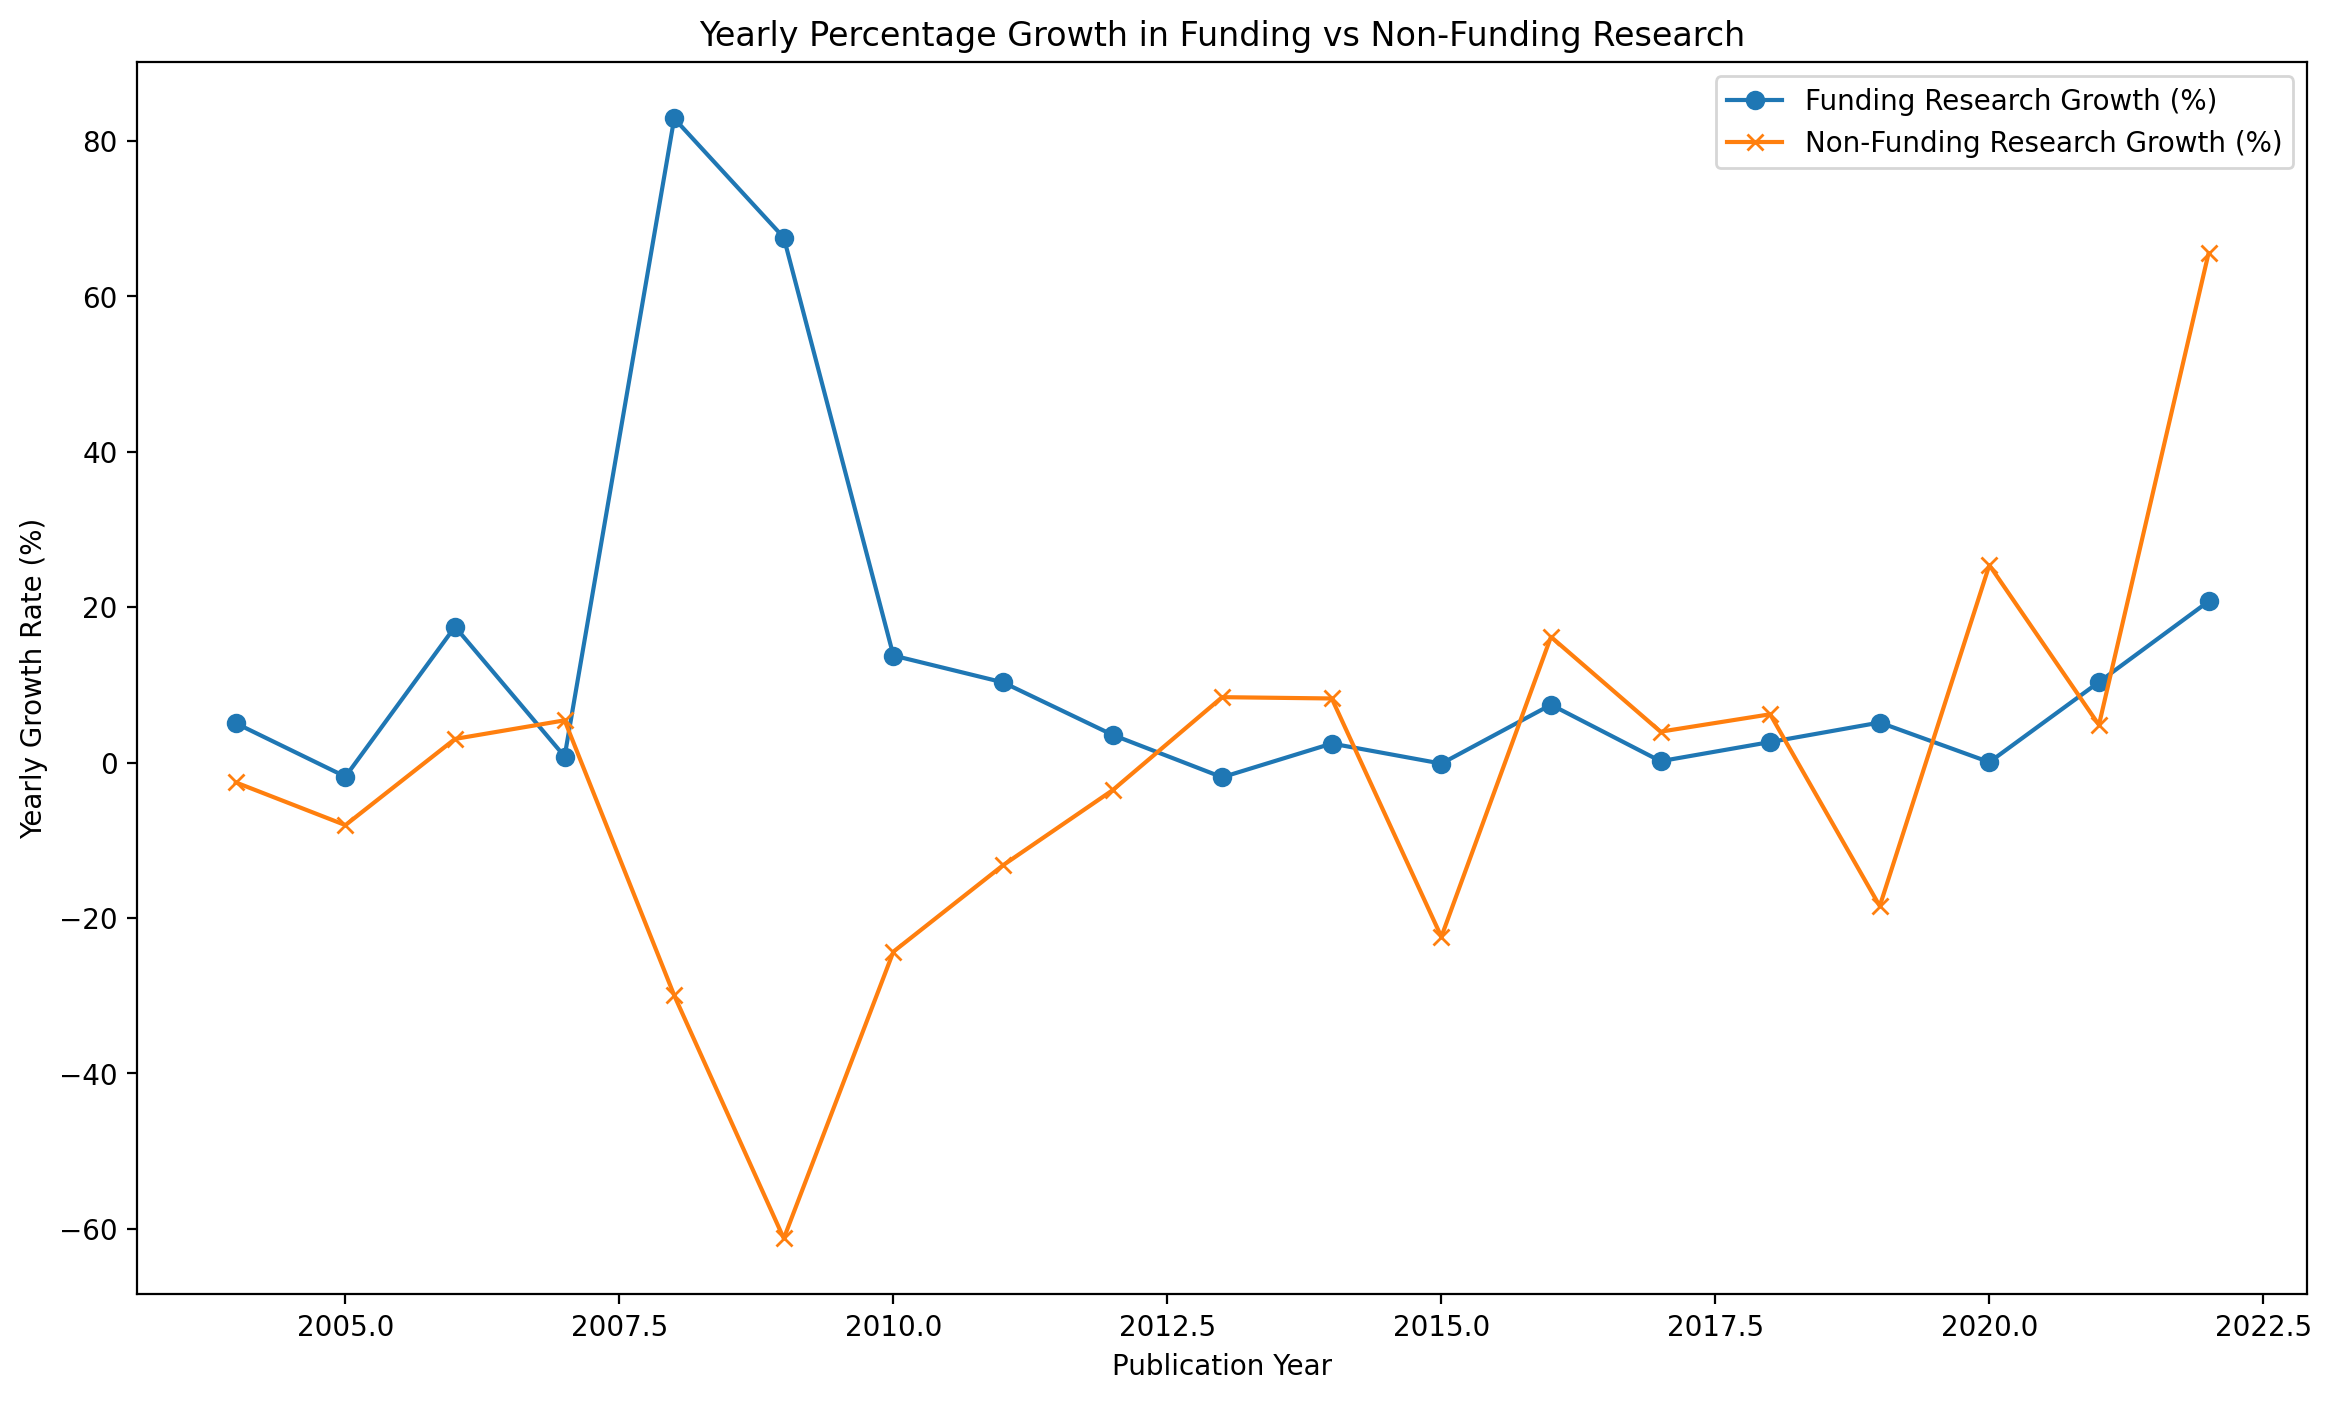

In [117]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
df = data_trend.iloc[:-1, :]

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['funding_trend_all'].pct_change()*100, label='Funding Research Growth (%)', marker='o')
plt.plot(df.index, df['not_funding_trend_all'].pct_change()*100, label='Non-Funding Research Growth (%)', marker='x')

plt.title("Yearly Percentage Growth in Funding vs Non-Funding Research")
plt.xlabel("Publication Year")
plt.ylabel("Yearly Growth Rate (%)")
plt.legend()
#plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
df = data_trend.iloc[:-1, :]


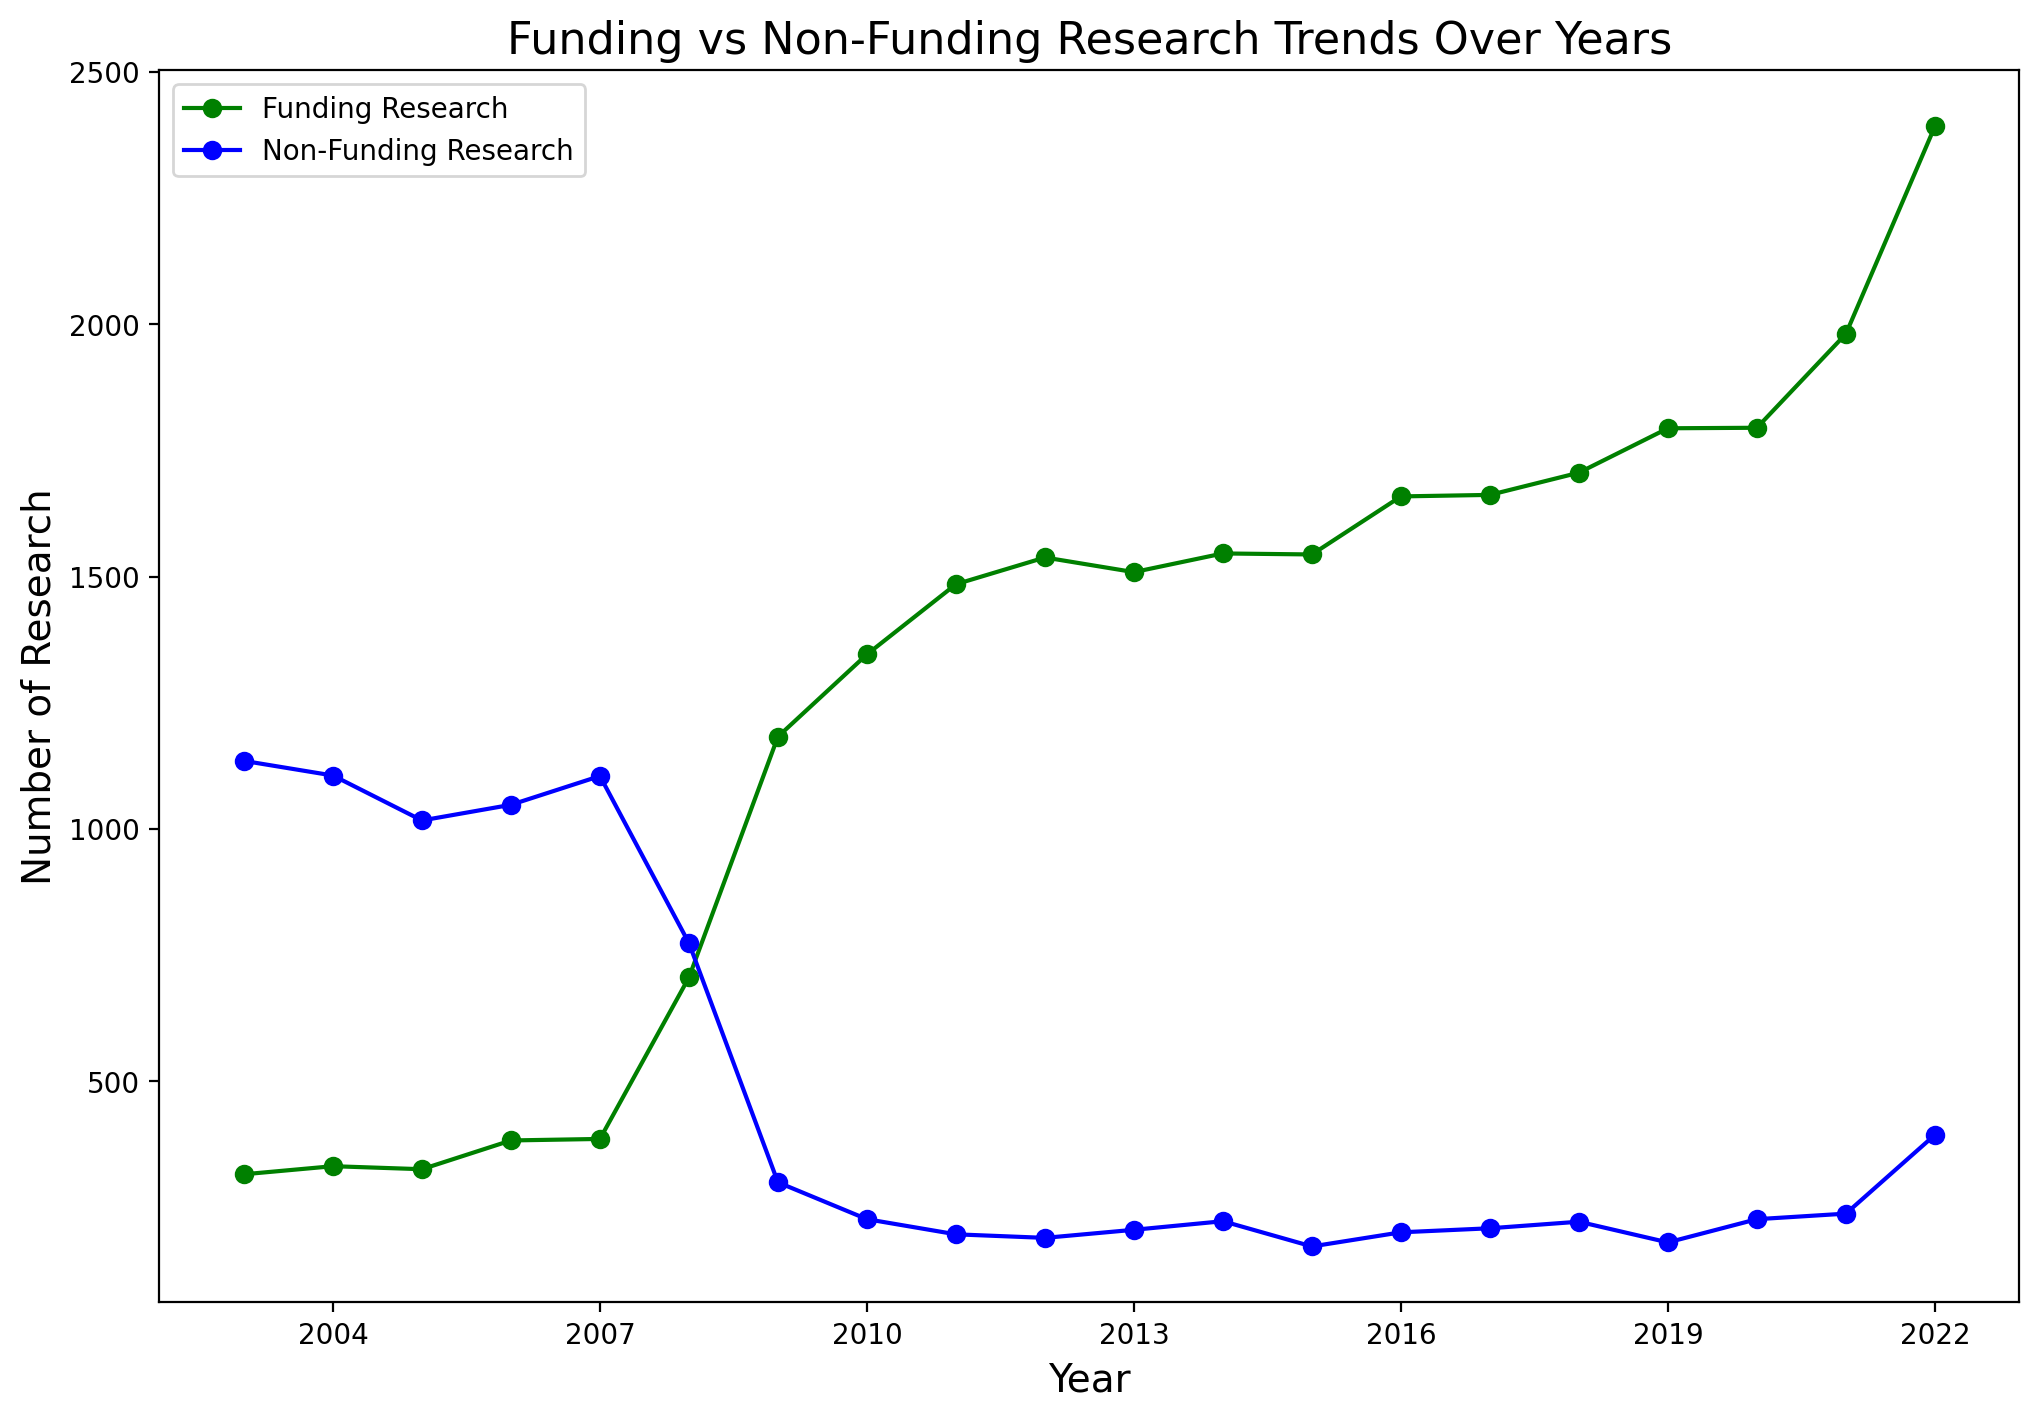

In [113]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming df is your dataframe
df = data_trend.iloc[:-1, :]

fig, ax = plt.subplots(figsize=(12, 8))  # Explicitly create figure and axis

# Plotting the lines
ax.plot(df.index, df['funding_trend_all'], label='Funding Research', marker='o', color='green')
ax.plot(df.index, df['not_funding_trend_all'], label="Non-Funding Research", marker='o', color='blue')

# Adding labels, title and legend
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Research', fontsize=14)
ax.set_title('Funding vs Non-Funding Research Trends Over Years', fontsize=16)
ax.legend()

# Grid for easier visualization
# ax.grid(True)

# Set integer ticks on the x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Save the plot at 300 dpi
# plt.tight_layout()
plt.savefig('/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funding_publication_year_plot.png', dpi=600)

plt.show()


## funder

In [67]:
funder_data['Funding Name Preferred'].count()

26559

In [68]:
#funder_data

In [69]:
import pandas as pd

# Your DataFrame is named funder_data
funder_list = funder_data['Funding Name Preferred'].str.split(';').explode().str.strip()

# Count the unique funder names
unique_funder_count = funder_list.nunique()

print('The number of unique funder is:', unique_funder_count)

# Count the appearances of each funder
funder_counts = funder_list.value_counts().to_frame()

funder_counts['%'] = funder_counts['Funding Name Preferred']/funder_data['Funding Name Preferred'].count()*100

#funder_counts##.head(50)

The number of unique funder is: 30676


In [70]:
#funder_list

In [71]:
funder_list2 = funder_list.to_frame().reset_index().set_index('Funding Name Preferred')
#funder_list2

In [72]:
# import funder clean
funder_counts_clean = pd.read_excel(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/Funding-Name-Preferred-csv2.xls')[
    ['Funding_Name_Preferred','Funding_Name_Preferred.1','Funding_Name_Preferred_clean']].set_index('Funding_Name_Preferred.1')
#funder_counts_clean

In [73]:
funder_list_and_clean = funder_list2.merge(funder_counts_clean,
                                           left_on='Funding Name Preferred',
                                           right_on='Funding_Name_Preferred',
                                           how='left').set_index(['wos_ID','Publication Year'])
#funder_list_and_clean

In [74]:
# Count the unique funder clean names
unique_funder_clean_count = funder_list_and_clean['Funding_Name_Preferred_clean'].nunique()

print('The number of unique funder_clean is:', unique_funder_clean_count)

#
funder_list_and_clean2 = funder_list_and_clean.reset_index()

# and sum citations within each group
grouped = funder_list_and_clean2.groupby(['Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/funder_data['Funding Name Preferred'].count()*100
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']
# Rename columns
grouped.columns = ['Funding_Name_Preferred_clean', 'count','citation', '%', 'Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_clean_counts_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_clean_counts_citation.csv')

grouped##.head(50)

The number of unique funder_clean is: 17568


Funding_Name_Preferred_clean  count  citation  \
0      'association de chefs de service du chru de na...      1         1   
1                    'castile and leon' autonomy (spain)      1         4   
2         'centre de recherche public-sante', luxembourg      2        34   
3      'complexo de central de apoio a pesquisa (comc...      1        11   
4                            'conseil general de l'eure'      1        13   
...                                                  ...    ...       ...   
17563           zunyi science and technology cooperation      2        15   
17564                                  zurcher krebsliga      1        68   
17565  zurich center for integrative human physiology...      1        11   
17566                                      zymo research      1         3   
17567                                       zymogenetics      1       106   

              %  Average Citation Count  
0      0.003765                     1.0  
1      0.003765                     4.0  
2      0.007530                    17.0  
3      0.003765                    11.0  
4      0.003765                    13.0  
...         ...                     ...  
17563  0.007530                     7.5  
17564  0.003765                    68.0  
17565  0.003765                    11.0  
17566  0.003765                     3.0  
17567  0.003765                   106.0  

[17568 rows x 5 columns]

In [75]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean2 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').drop_duplicates().dropna().reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean2['Year Group'] = pd.cut(funder_list_and_clean2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and count author appearances in each group
grouped = funder_list_and_clean2.groupby(['Year Group','Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Convert the Series to a DataFrame and rename the column
funder_counts_group = grouped.rename(columns={'wos_ID': 'counts'}).reset_index().drop(columns='index')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (funder_counts_group['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
funder_counts_group_filtered = funder_counts_group[~mask]

# Rename columns
funder_counts_group_filtered.columns = ['Year Group','Funding_Name_Preferred_clean', 'Publication Count', 'Total Citations', 'Average Citation Count']

# Print the result
#funder_counts_group_filtered#.tail(60)

In [76]:
# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean3 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').dropna().reset_index()
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean3['Year Group'] = pd.cut(funder_list_and_clean3['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and 'Funding_Name_Preferred_clean', count number of publications
# and sum citations within each group
grouped = funder_list_and_clean3.groupby(['Year Group','Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']
# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Funding_Name_Preferred_clean', 'Publication Count', 'Total Citations', 'Average Citation Count']

#grouped_filtered


In [77]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Funding_Name_Preferred_clean', columns='Year Group', values=['Publication Count', 'Total Citations','Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/funder_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count  \
Year Group                                              [2003, 2008)   
Funding_Name_Preferred_clean                                           
'association de chefs de service du chru de nan...               0.0   
'castile and leon' autonomy (spain)                              0.0   
'centre de recherche public-sante', luxembourg                   0.0   
'complexo de central de apoio a pesquisa (comca...               0.0   
'conseil general de l'eure'                                      0.0   
...                                                              ...   
zunyi science and technology cooperation                         0.0   
zurcher krebsliga                                                0.0   
zurich center for integrative human physiology ...               0.0   
zymo research                                                    0.0   
zymogenetics                                                     0.0   

                                                                              \
Year Group                                         [2008, 2013) [2013, 2018)   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          0.0          0.0   
'castile and leon' autonomy (spain)                         0.0          1.0   
'centre de recherche public-sante', luxembourg              1.0          1.0   
'complexo de central de apoio a pesquisa (comca...          0.0          0.0   
'conseil general de l'eure'                                 1.0          0.0   
...                                                         ...          ...   
zunyi science and technology cooperation                    0.0          0.0   
zurcher krebsliga                                           1.0          0.0   
zurich center for integrative human physiology ...          1.0          0.0   
zymo research                                               0.0          0.0   
zymogenetics                                                1.0          0.0   

                                                                              \
Year Group                                         [2018, 2023) [2023, 2028)   
Funding_Name_Preferred_clean                                                   
'association de chefs de service du chru de nan...          1.0          0.0   
'castile and leon' autonomy (spain)                         0.0          0.0   
'centre de recherche public-sante', luxembourg              0.0          0.0   
'complexo de central de apoio a pesquisa (comca...          1.0          0.0   
'conseil general de l'eure'                                 0.0          0.0   
...                                                         ...          ...   
zunyi science and technology cooperation                    1.0          1.0   
zurcher krebsliga                                           0.0          0.0   
zurich center for integrative human physiology ...          0.0          0.0   
zymo research                                               1.0          0.0   
zymogenetics                                                0.0          0.0   

                                                   Total Citations  \
Year Group                                            [2003, 2008)   
Funding_Name_Preferred_clean                                         
'association de chefs de service du chru de nan...             0.0   
'castile and leon' autonomy (spain)                            0.0   
'centre de recherche public-sante', luxembourg                 0.0   
'complexo de central de apoio a pesquisa (comca...             0.0   
'conseil general de l'eure'                                    0.0   
...                                                            ...   
zunyi science and technology cooperation                       0.0   
zurcher krebsliga                                              0.0   
zurich center for integrative 

# topics

In [78]:
topics_data_citation = pd.read_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topic_probability_scholar_19.pkl').reset_index()[
    ['UT (Unique WOS ID)','Publication Year','Topic N°', 'Times Cited, All Databases']]

topics_data_citation = topics_data_citation.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
topics_data_citation

Publication Year  Topic N°  Times Cited, All Databases
wos_ID                                                                     
wos:000183215700003              2003         6                          19
wos:000180955900018              2003        11                         114
wos:000183683300008              2003        11                           2
wos:000184760800009              2003        12                          26
wos:000187153000005              2003        13                          14
...                               ...       ...                         ...
wos:000959867000004              2023        13                           0
wos:000968835000001              2023         4                           0
wos:000933339800001              2023        12                           0
wos:000914484900001              2023        15                           5
wos:000912073200001              2023         7                           1

[36202 rows x 3 columns]

In [79]:
#citation_data = data.copy().reset_index().set_index(['wos_ID','Publication Year'])[['Times Cited, All Databases']]
#citation_data

In [80]:
#topics_data_citation = pd.concat([topics_data, citation_data], axis=1)
#topics_data_citation

In [81]:
# Count the unique topic names
unique_topic_count = topics_data_citation['Topic N°'].nunique()

print('The number of unique topics is:', unique_topic_count)

#
topics_data_citation2 = topics_data_citation.reset_index()

# and sum citations within each group
grouped = topics_data_citation2.groupby(['Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/topics_data_citation['Topic N°'].count()*100

grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Rename columns
grouped.columns = ['Topic N°', 'Publication Count', 'Total Citations', '%','Average Citation Count']

# Save data
grouped.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_counts_citation.pkl')
grouped.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_counts_citation.csv')

grouped##.head(50)

The number of unique topics is: 19


Topic N°  Publication Count  Total Citations          %  \
0          0                707            20935   1.952931   
1          1               2832           116073   7.822772   
2          2               2328            65672   6.430584   
3          3               1337            46835   3.693166   
4          4               2505            76856   6.919507   
5          5               3433           152627   9.482901   
6          6               4179           112727  11.543561   
7          7               1180            41600   3.259488   
8          8               3936           110287  10.872327   
9          9                605            16065   1.671178   
10        10               1853            68947   5.118502   
11        11               2032            54124   5.612950   
12        12               2280            65650   6.297995   
13        13               1398            50928   3.861665   
14        14               1149            37895   3.173858   
15        15                343            10456   0.947461   
16        16               1769            63183   4.886470   
17        17               1839            48096   5.079830   
18        18                497            13606   1.372852   

    Average Citation Count  
0                29.611033  
1                40.986229  
2                28.209622  
3                35.029918  
4                30.681038  
5                44.458782  
6                26.974635  
7                35.254237  
8                28.020071  
9                26.553719  
10               37.208311  
11               26.635827  
12               28.793860  
13               36.429185  
14               32.980853  
15               30.483965  
16               35.716789  
17               26.153344  
18               27.376258

In [82]:
topics_data2 = topics_data_citation.reset_index()#.set_index('wos_ID')
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
topics_data2['Year Group'] = pd.cut(topics_data2['Publication Year'], bins=range(2003, 2029, 5), right=False)

# Group by 'Year Group' and 'Topic N°', count number of publications
# and sum citations within each group
grouped = topics_data2.groupby(['Year Group','Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()
grouped['Average Citation Count'] = grouped['Times Cited, All Databases']/grouped['wos_ID']
# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Topic N°', 'Publication Count', 'Total Citations', 'Average Citation Count']

#grouped_filtered


In [83]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Topic N°', columns='Year Group', values=['Publication Count', 'Total Citations', 'Average Citation Count'])

# Fill NaN values with 0
#pivot_df.fillna(0, inplace=True)
# Save data
pivot_df.to_pickle(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'/content/drive/MyDrive/YORKU PROJECT/JUDE/BACTERIOPHAGE/topics_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
# Replace NaN values with 0 in-place
pivot_df.fillna(0)


Publication Count                                         \
Year Group      [2003, 2008) [2008, 2013) [2013, 2018) [2018, 2023)   
Topic N°                                                              
0                      224.0        171.0        162.0        138.0   
1                      236.0        462.0        752.0       1217.0   
2                      592.0        632.0        579.0        480.0   
3                      448.0        342.0        304.0        216.0   
4                      328.0        526.0        685.0        860.0   
5                      535.0        660.0        854.0       1267.0   
6                     1034.0       1002.0       1075.0        980.0   
7                      370.0        290.0        250.0        253.0   
8                      469.0        591.0        927.0       1722.0   
9                      206.0        195.0        130.0         71.0   
10                     316.0        412.0        468.0        557.0   
11                     694.0        549.0        429.0        339.0   
12                     370.0        516.0        585.0        733.0   
13                     335.0        408.0        377.0        262.0   
14                     121.0        200.0        283.0        491.0   
15                      73.0         69.0         57.0        119.0   
16                     403.0        402.0        446.0        462.0   
17                     234.0        391.0        463.0        669.0   
18                     166.0        128.0        106.0         94.0   

                        Total Citations                            \
Year Group [2023, 2028)    [2003, 2008) [2008, 2013) [2013, 2018)   
Topic N°                                                            
0                  12.0          7591.0       6244.0       5773.0   
1                 165.0         24426.0      28932.0      40022.0   
2                  45.0         26768.0      22185.0      12536.0   
3                  27.0         18105.0      12587.0      11060.0   
4                 106.0         20471.0      26138.0      20731.0   
5                 117.0         51544.0      57237.0      29896.0   
6                  88.0         45688.0      36000.0      22039.0   
7                  17.0         20625.0      10566.0       7021.0   
8                 227.0         29151.0      27561.0      31659.0   
9                   3.0          8537.0       4673.0       2256.0   
10                100.0         22876.0      22601.0      15506.0   
11                 21.0         26353.0      16567.0       8491.0   
12                 76.0         20608.0      20271.0      15600.0   
13                 16.0         20281.0      16949.0      10799.0   
14                 54.0          8106.0      10102.0      11688.0   
15                 25.0          3648.0       2409.0       2199.0   
16                 56.0         24801.0      19608.0      13402.0   
17                 82.0         14337.0      14337.0      13315.0   
18                  3.0          7134.0       3674.0       2062.0   

                                     Average Citation Count               \
Year Group [2018, 2023) [2023, 2028)           [2003, 2008) [2008, 2013)   
Topic N°                                                                   
0                1324.0          3.0              33.888393    36.514620   
1               22641.0         52.0             103.500000    62.623377   
2                4174.0          9.0              45.216216    35.102848   
3                5078.0          5.0              40.412946    36.804094   
4                9488.0         28.0              62.411585    49.692015   
5               13930.0         20.0              96.343925    86.722727   
6                8982.0         18.0              44.185687    35.928144   
7                3375.0         13.0              55.743243    36.434483   
8               21799.0        117.0              62.155650    46.634518   
9                

In [84]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

NameError: ignored

In [ ]:
country_data['number_of_country'] = country_data.notnull().sum(axis=1)
number_country = country_data[['number_of_country']]
number_country = number_country.reset_index().rename(columns = {'UT (Unique WOS ID)':'wos_ID'})
number_country['wos_ID'] = number_country['wos_ID'].str.lower()
number_country

In [ ]:
number_country.describe()

In [ ]:
number_country.isna().sum()

In [ ]:
# number_country#.head(60)

In [ ]:
data_and_number_country = pd.concat([data.set_index('wos_ID'),
                           number_country.set_index('wos_ID')],
                          axis=1)
data_and_number_country#.head(2)

In [ ]:
# to drop rows with 0 values in column 'number_of_country':
data_and_number_country = data_and_number_country[data_and_number_country['number_of_country'] != 0]

In [ ]:
# data_and_number_country.describe()

In [ ]:
data_and_number_country.isna().sum()

## analysis based on number of country

### proportion all

In [ ]:
data_and_number_country['number_of_country'].isna().sum()

In [ ]:
data_and_number_countryT = data_and_number_country.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country.columns:
    number_of_country_count_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'all_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'all_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_all = data_and_number_countryT_concat[['countries','all_number_of_country_count','all_number_of_country_mean']]

# save data
data_and_number_countryT_concat_all.to_csv(f'../TABLES/region_countries_org_number_of_country_count_mean.csv')
data_and_number_countryT_concat_all

In [ ]:
len(number_of_country_count)

In [ ]:
len(number_of_country_mean)

In [ ]:
len(countries)

In [ ]:
vvvvvvvvvvvvvvvvvv

### proportion fund

In [ ]:
data_and_number_country_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]
data_and_number_country_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_fund.columns:
    number_of_country_count_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_fund = data_and_number_countryT_concat[['countries','fund_number_of_country_count','fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_fund

### proportion no fund

In [ ]:
data_and_number_country_no_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]
data_and_number_country_no_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_no_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_no_fund.columns:
    number_of_country_count_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_no_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_nofund = data_and_number_countryT_concat[['countries','no_fund_number_of_country_count','no_fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_no_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_nofund

### concat and save data

In [ ]:
# concatenate dataframes on index
concat_data_number_of_country_list = pd.concat([data_and_number_countryT_concat_all.set_index('countries'),
                                    data_and_number_countryT_concat_number_of_country_fund.set_index('countries'),
                                    data_and_number_countryT_concat_number_of_country_nofund.set_index('countries')],
                                    axis=1)
# save data
concat_data_number_of_country_list.to_csv(f'../TABLES/concat_data_number_of_country_list.csv')
concat_data_number_of_country_list

### significance

In [ ]:
number_country.describe()

In [ ]:
fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]['number_of_country']#.to_list()
fund_number_of_country.describe()

In [ ]:
no_fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]['number_of_country']#.to_list()
no_fund_number_of_country.describe()

In [ ]:
test_sig(fund_number_of_country, no_fund_number_of_country)

In [ ]:
fund_number_of_country_new = [x for x in fund_number_of_country if x != 0]
no_fund_number_of_country_new = [x for x in no_fund_number_of_country if x != 0]

In [ ]:
test_sig(fund_number_of_country_new, no_fund_number_of_country_new)

In [ ]:
import plotly.express as px
fig = px.box(data_and_number_country, x="funding_yes", y='number_of_country', color="funding_yes")
# setting the y-axis range from 0 to 50
fig.update_layout(yaxis_range=[-2,100])
fig.update_layout(font_size=20)

fig.show()